In [1]:
# Load required libraries
library(readxl)
library(lme4)

# Step 1: Load the Data
data <- read_excel("/kaggle/input/dinasore/DinosaurGameData.xlsx")



# Step 3: Model Building (Using GLMM)
# Define the model formula including fixed and random effects
glmm_model_accuracy <- glmer(`Accuracy (True = Correct, False = Incorrect)` ~ `Proficiency (LexTale Score)` + Stress + `Syllabic Structure` + (1 | `Player ID`), data = data, family = binomial)
glmm_model_response_time <- lmer(`RTs (MS)` ~ `Proficiency (LexTale Score)` + Stress + `Syllabic Structure` + (1 | `Player ID`), data = data)

# Step 4: Model Assessment
summary(glmm_model_accuracy)
summary(glmm_model_response_time)




Loading required package: Matrix



Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: 
`Accuracy (True = Correct, False = Incorrect)` ~ `Proficiency (LexTale Score)` +  
    Stress + `Syllabic Structure` + (1 | `Player ID`)
   Data: data

     AIC      BIC   logLik deviance df.resid 
 26461.1  26500.5 -13225.5  26451.1    19858 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.4146 -1.2315  0.7520  0.7952  0.8620 

Random effects:
 Groups    Name        Variance Std.Dev.
 Player ID (Intercept) 0.01121  0.1059  
Number of obs: 19863, groups:  Player ID, 20

Fixed effects:
                               Estimate Std. Error z value Pr(>|z|)    
(Intercept)                    0.523952   0.034934  14.998   <2e-16 ***
`Proficiency (LexTale Score)` -0.001504   0.002075  -0.725    0.469    
Stressparoxytone              -0.034331   0.029262  -1.173    0.241    
`Syllabic Structure`CVC       -0.041680   0.029259  -1.425    0.154    
-

Linear mixed model fit by REML ['lmerMod']
Formula: 
`RTs (MS)` ~ `Proficiency (LexTale Score)` + Stress + `Syllabic Structure` +  
    (1 | `Player ID`)
   Data: data

REML criterion at convergence: 366863

Scaled residuals: 
   Min     1Q Median     3Q    Max 
-0.833 -0.216 -0.078  0.067 48.590 

Random effects:
 Groups    Name        Variance Std.Dev.
 Player ID (Intercept)  125923   354.9  
 Residual              6142201  2478.3  
Number of obs: 19863, groups:  Player ID, 20

Fixed effects:
                              Estimate Std. Error t value
(Intercept)                   1172.549     85.597  13.699
`Proficiency (LexTale Score)`  -18.134      6.108  -2.969
Stressparoxytone                14.381     35.258   0.408
`Syllabic Structure`CVC        -59.185     35.249  -1.679

Correlation of Fixed Effects:
            (Intr) `P(LTS Strssp
`P(LxTScr)`  0.109              
Strssprxytn -0.196 -0.002       
`SStrct`CVC -0.194  0.003 -0.042

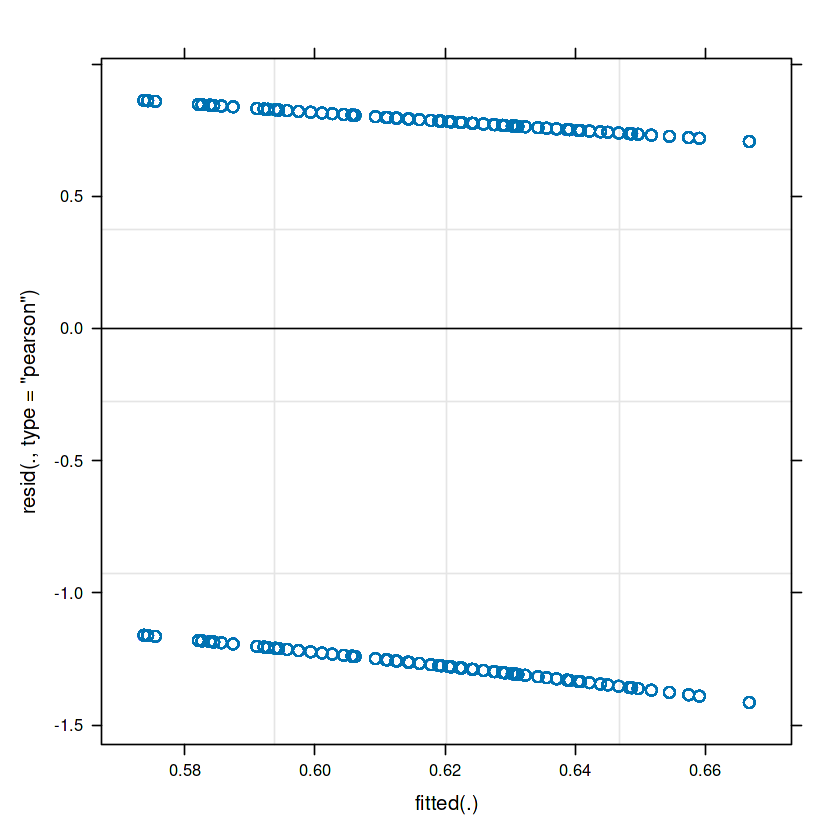

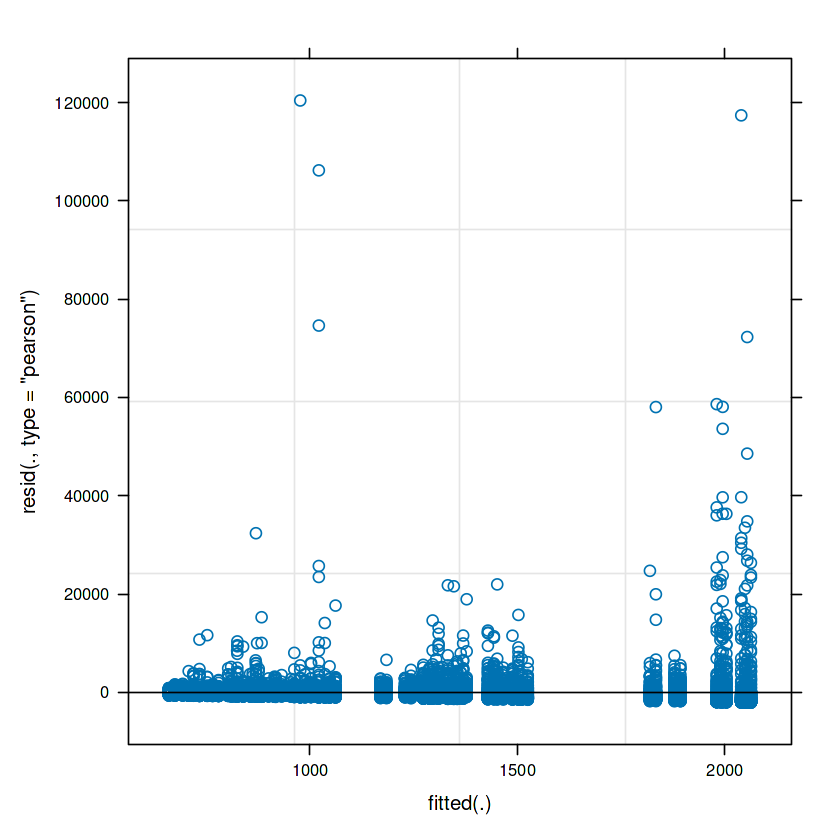

In [2]:
# Load required libraries
library(ggplot2)

# Diagnostic plots for GLMM (accuracy)
glmm_diag_plots_accuracy <- plot(glmm_model_accuracy)

# Diagnostic plots for LMM (response time)
lmm_diag_plots_response_time <- plot(glmm_model_response_time)

# Visualize the plots
glmm_diag_plots_accuracy
lmm_diag_plots_response_time


generate diagnostic plots for both the GLMM and LMM model

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“Computation failed in `stat_smooth()`
Caused by error:
! y values must be 0 <= y <= 1”
`geom_smooth()` using formula = 'y ~ x'


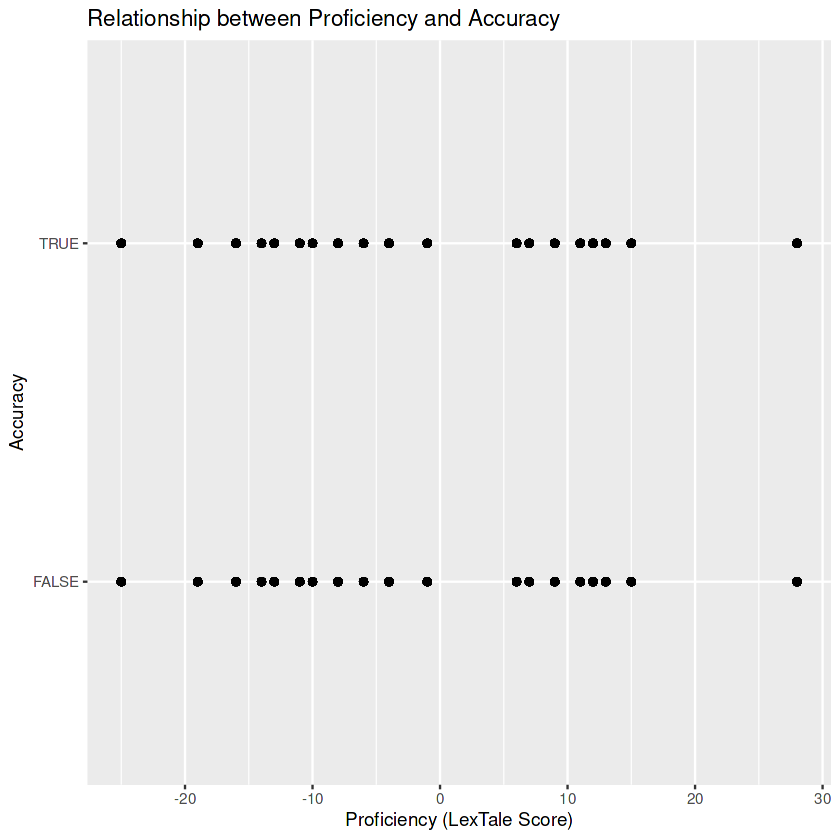

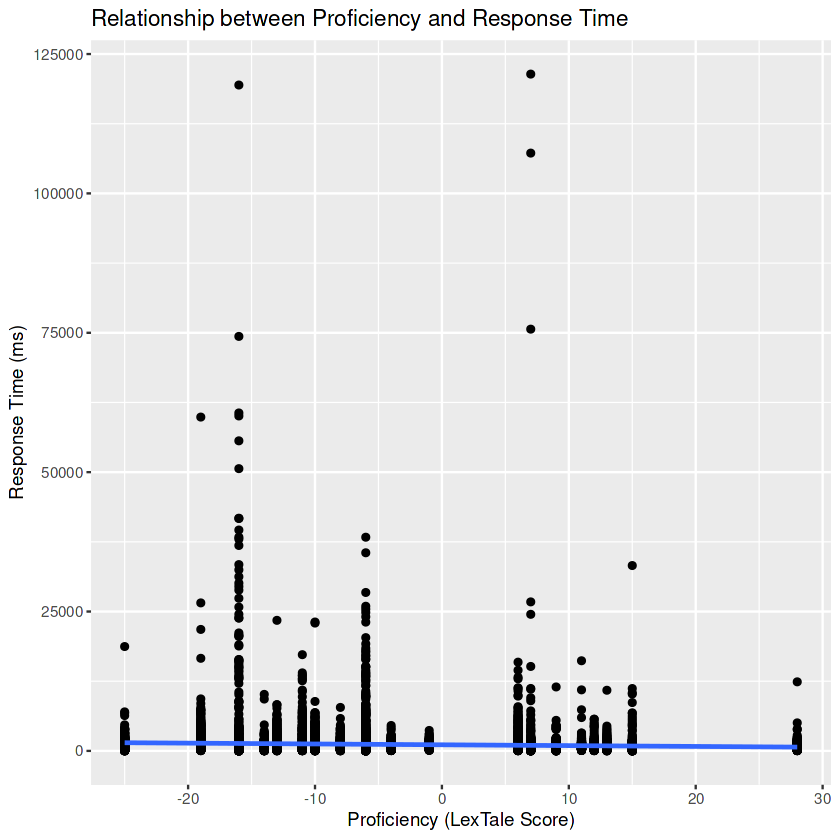

In [3]:
library(ggplot2)

# Scatter plot for GLMM
ggplot(data, aes(x = `Proficiency (LexTale Score)`, y = `Accuracy (True = Correct, False = Incorrect)`)) +
  geom_point() +
  geom_smooth(method = "glm", method.args = list(family = "binomial"), se = FALSE) +
  labs(x = "Proficiency (LexTale Score)", y = "Accuracy") +
  ggtitle("Relationship between Proficiency and Accuracy")



ggplot(data, aes(x = `Proficiency (LexTale Score)`, y = `RTs (MS)`)) +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE) +
  labs(x = "Proficiency (LexTale Score)", y = "Response Time (ms)") +
  ggtitle("Relationship between Proficiency and Response Time")



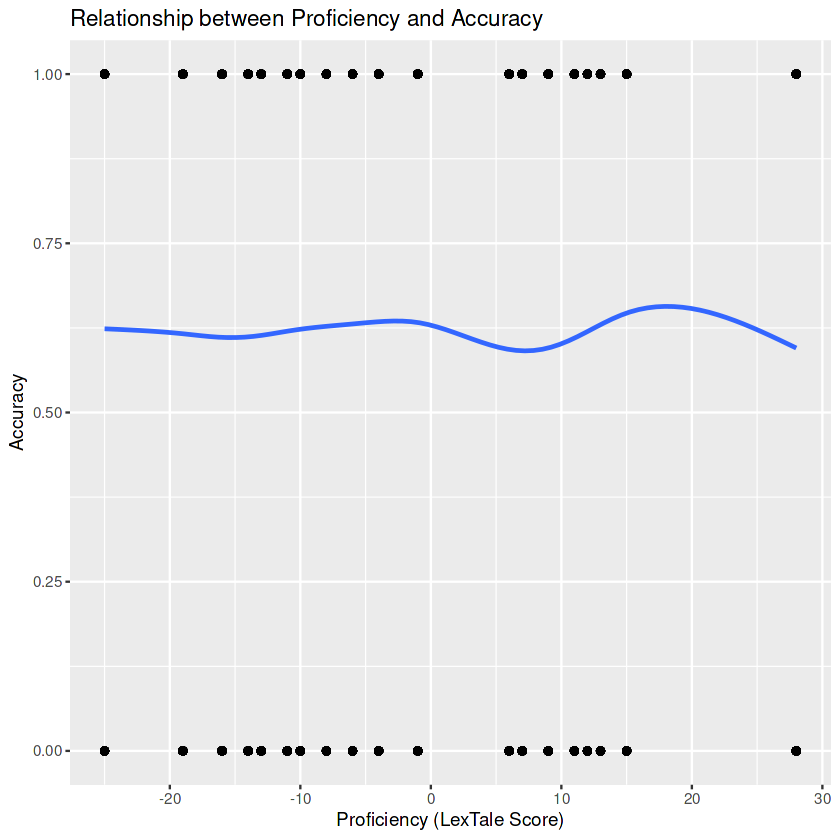

In [4]:
library(ggplot2)

# Assuming your data frame is named 'data'
# Convert 'Accuracy' from logical to numeric (0 and 1)
data$Accuracy_numeric <- as.numeric(data$`Accuracy (True = Correct, False = Incorrect)`)

# Create a ggplot
ggplot(data, aes(x = `Proficiency (LexTale Score)`, y = Accuracy_numeric)) +
  geom_point() +  # Add points for the data
  geom_smooth(method = "gam", formula = y ~ s(x), se = FALSE) +  # Add GAM smooth
  labs(x = "Proficiency (LexTale Score)", y = "Accuracy") +  # Labels
  ggtitle("Relationship between Proficiency and Accuracy")  # Title


In [5]:
# Load required libraries
library(readxl)
library(dplyr)
library(lme4)

# Step 1: Load the Data
data <- read_excel("/kaggle/input/dinasore/DinosaurGameData.xlsx")

# Step 2: Preprocess the Data
# Exclude items with response times above 5000 ms
data_filtered <- data %>% filter(`RTs (MS)` <= 5000)

# Filter data for accurate choices only
data_accurate <- data_filtered %>% filter(`Accuracy (True = Correct, False = Incorrect)`)

# Step 3: Model Building (Using GLMM)
# Define the model formula including fixed and random effects for accuracy
glmm_model_accuracy <- glmer(`Accuracy (True = Correct, False = Incorrect)` ~ `Proficiency (LexTale Score)` + Stress + `Syllabic Structure` + (1 | `Player ID`), data = data_filtered, family = binomial)

# Define the model formula including fixed and random effects for response time (accurate choices only)
lmer_model_response_time <- lmer(`RTs (MS)` ~ `Proficiency (LexTale Score)` + Stress + `Syllabic Structure` + (1 | `Player ID`), data = data_accurate)

# Step 4: Model Assessment
summary(glmm_model_accuracy)
summary(lmer_model_response_time)

# Step 5: Interpret Results
# Interpret fixed effects coefficients, check significance, and assess goodness-of-fit



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: 
`Accuracy (True = Correct, False = Incorrect)` ~ `Proficiency (LexTale Score)` +  
    Stress + `Syllabic Structure` + (1 | `Player ID`)
   Data: data_filtered

     AIC      BIC   logLik deviance df.resid 
 26061.2  26100.6 -13025.6  26051.2    19537 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.4225 -1.2172  0.7515  0.7978  0.8846 

Random effects:
 Groups    Name        Variance Std.Dev.
 Player ID (Intercept) 0.01495  0.1223  
Number of obs: 19542, groups:  Player ID, 20

Fixed effects:
                                Estimate Std. Error z value Pr(>|z|)    
(Intercept)                    0.5137060  0.0376801  13.633   <2e-16 ***
`Proficiency (LexTale Score)` -0.0009038  0.0023224  -0.389    0.697    
Stressparoxytone              -0.0338142  0.0294943  -1.146    0.252    
`Syllabic Structure`CVC       -0.0393356  0.0294812  -1.334 

Linear mixed model fit by REML ['lmerMod']
Formula: 
`RTs (MS)` ~ `Proficiency (LexTale Score)` + Stress + `Syllabic Structure` +  
    (1 | `Player ID`)
   Data: data_accurate

REML criterion at convergence: 189327

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.2536 -0.5985 -0.1560  0.3800  6.1665 

Random effects:
 Groups    Name        Variance Std.Dev.
 Player ID (Intercept)  42413   205.9   
 Residual              430848   656.4   
Number of obs: 11971, groups:  Player ID, 20

Fixed effects:
                              Estimate Std. Error t value
(Intercept)                    989.484     47.549  20.810
`Proficiency (LexTale Score)`  -11.003      3.491  -3.152
Stressparoxytone               -17.652     12.058  -1.464
`Syllabic Structure`CVC        -39.370     12.024  -3.274

Correlation of Fixed Effects:
            (Intr) `P(LTS Strssp
`P(LxTScr)`  0.116              
Strssprxytn -0.122 -0.002       
`SStrct`CVC -0.121  0.002 -0.029

the GLMM for accuracy suggests that the predictors do not significantly influence accuracy, while the LMER for response time indicates significant effects of Proficiency (LexTale Score) and Syllabic Structure on response time for accurate choices.


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine


`geom_smooth()` using formula = 'y ~ x'


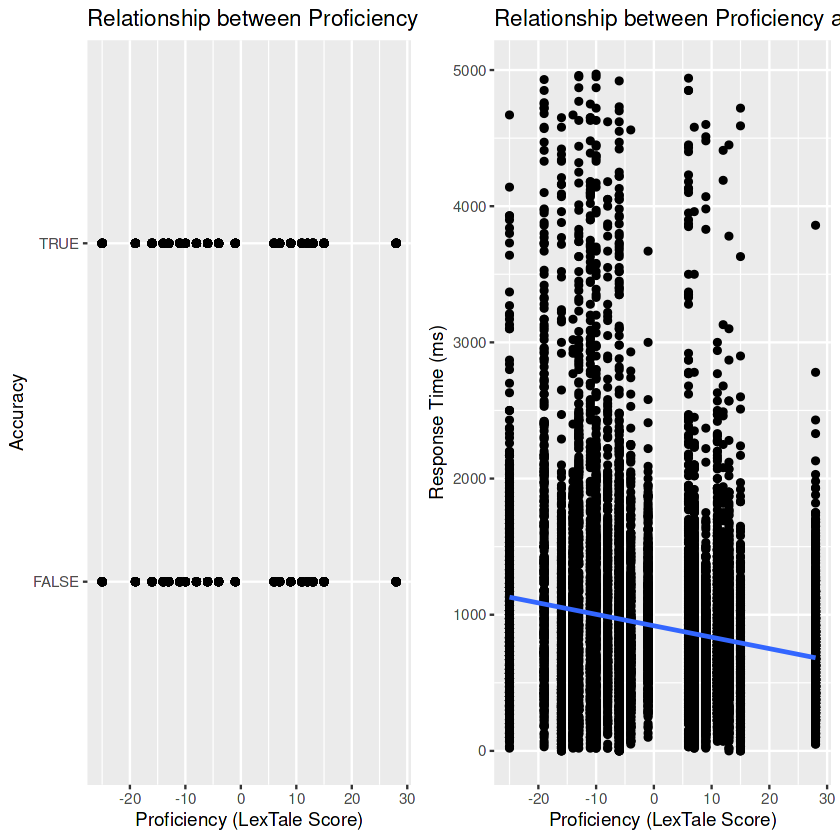

In [6]:
# Plot for GLMM (Accuracy)
glmm_plot <- ggplot(data, aes(x = `Proficiency (LexTale Score)`, y = `Accuracy (True = Correct, False = Incorrect)`)) +
  geom_point() +
  labs(x = "Proficiency (LexTale Score)", y = "Accuracy") +
  ggtitle("Relationship between Proficiency and Accuracy in GLMM")

# Plot for LMER (Response Time)
lmer_plot <- ggplot(data_accurate, aes(x = `Proficiency (LexTale Score)`, y = `RTs (MS)`)) +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE) +
  labs(x = "Proficiency (LexTale Score)", y = "Response Time (ms)") +
  ggtitle("Relationship between Proficiency and Response Time in LMER (Accurate Choices)")

# Combine plots
library(gridExtra)
grid.arrange(glmm_plot, lmer_plot, ncol = 2)


# 1.  **Load Libraries: **

In [7]:
library(tidyverse)  # For data manipulation and visualization
library(lme4)       # For fitting GLMMs
library(mgcv)       # For fitting GAMs
install.packages("conflicted")
library(conflicted)
conflict_prefer("combine", "gridExtra")


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.0
✔ readr     2.1.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ gridExtra::combine() masks dplyr::combine()
✖ tidyr::expand()      masks Matrix::expand()
✖ dplyr::filter()      masks stats::filter()
✖ dplyr::lag()         masks stats::lag()
✖ tidyr::pack()        masks Matrix::pack()
✖ tidyr::unpack()      masks Matrix::unpack()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: nlme


Attaching package: ‘nlme’


The following object is masked from ‘package:dplyr’:

    collapse


The following object is masked from ‘package:lme4’:

    lmList


This is mgcv 1.9-0. For overview type 'help("mgcv-package")'.

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’

# Load Data

In [8]:
data <- read_excel("/kaggle/input/dinoupdate/UpdateDinosaurGameData.xlsx")


In [9]:
str(data)
summary(data)

tibble [19,863 × 9] (S3: tbl_df/tbl/data.frame)
 $ PlayerID               : num [1:19863] 1 1 1 1 1 1 1 1 1 1 ...
 $ Level                  : num [1:19863] 1 1 1 1 1 1 1 1 1 1 ...
 $ Trial                  : num [1:19863] 1 2 3 4 5 6 7 8 9 10 ...
 $ ProficiencyLexTaleScore: num [1:19863] -8 -8 -8 -8 -8 -8 -8 -8 -8 -8 ...
 $ Stress                 : chr [1:19863] "paroxytone" "paroxytone" "paroxytone" "oxytone" ...
 $ SyllabicStructure      : chr [1:19863] "CV" "CVC" "CV" "CVC" ...
 $ SentenceID             : chr [1:19863] "48_C2" "58_C1" "48_C2" "12_C2" ...
 $ Accuracy               : logi [1:19863] TRUE FALSE FALSE FALSE TRUE FALSE ...
 $ RTsMS                  : num [1:19863] 1540 670 880 2450 2500 2780 840 580 720 570 ...


    PlayerID         Level            Trial        ProficiencyLexTaleScore
 Min.   : 1.00   Min.   : 1.000   Min.   :   1.0   Min.   :-25.0000       
 1st Qu.: 6.00   1st Qu.: 6.000   1st Qu.: 249.0   1st Qu.:-13.0000       
 Median :11.00   Median : 8.000   Median : 500.0   Median : -1.0000       
 Mean   :10.91   Mean   : 7.689   Mean   : 579.5   Mean   : -0.2938       
 3rd Qu.:16.00   3rd Qu.:10.000   3rd Qu.: 832.0   3rd Qu.: 11.0000       
 Max.   :20.00   Max.   :12.000   Max.   :1817.0   Max.   : 28.0000       
    Stress          SyllabicStructure   SentenceID         Accuracy      
 Length:19863       Length:19863       Length:19863       Mode :logical  
 Class :character   Class :character   Class :character   FALSE:7656     
 Mode  :character   Mode  :character   Mode  :character   TRUE :12207    
                                                                         
                                                                         
                               

Based on the structure of data, it appears that you have repeated measures from the same players (identified by "Player ID"). This suggests a potential hierarchical or nested structure in your data, where observations (e.g., trials) are nested within players.

Hierarchical structure typically arises in longitudinal or repeated measures data, where multiple observations are taken from the same individuals over time or across different conditions. In this case, the hierarchical structure would involve players being nested within themselves, as they contribute multiple observations to the dataset.

# Data Preparation
Filter out response times above 5000 ms and subset the data for accurate choices.

In [10]:
# Filter out response times above 5000 ms
data_filtered <- data %>%
  dplyr::filter(RTsMS <= 5000)

# Subset data for accurate choices
data_accurate <- data_filtered %>%
  dplyr::filter(Accuracy == TRUE)


# Model Fitting:
* Fit GLMMs for accuracy using the glmer function from lme4.
* Fit GAMs for response time using the gam function from mgcv.

In [11]:
library(lme4)

# Fit GLMM for binary accuracy
glmm_model <- glmer(Accuracy ~ ProficiencyLexTaleScore + Stress + SyllabicStructure + 
                      (1 | PlayerID) + (1 | SentenceID),
                    data = data_filtered,
                    family = binomial(link = "logit"))

# Print model summary
summary(glmm_model)



Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: Accuracy ~ ProficiencyLexTaleScore + Stress + SyllabicStructure +  
    (1 | PlayerID) + (1 | SentenceID)
   Data: data_filtered

     AIC      BIC   logLik deviance df.resid 
 25948.0  25995.3 -12968.0  25936.0    19536 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.7451 -1.1801  0.7046  0.7982  1.1715 

Random effects:
 Groups     Name        Variance Std.Dev.
 SentenceID (Intercept) 0.06305  0.2511  
 PlayerID   (Intercept) 0.01595  0.1263  
Number of obs: 19542, groups:  SentenceID, 192; PlayerID, 20

Fixed effects:
                          Estimate Std. Error z value Pr(>|z|)    
(Intercept)              0.5311199  0.0498673  10.651   <2e-16 ***
ProficiencyLexTaleScore -0.0008731  0.0023914  -0.365    0.715    
Stressparoxytone        -0.0465304  0.0471157  -0.988    0.323    
SyllabicStructureCVC    -0.0395247  0.0471032  -0.839   

In [12]:
summary(data_accurate)


    PlayerID         Level            Trial        ProficiencyLexTaleScore
 Min.   : 1.00   Min.   : 1.000   Min.   :   1.0   Min.   :-25.0000       
 1st Qu.: 6.00   1st Qu.: 6.000   1st Qu.: 245.0   1st Qu.:-13.0000       
 Median :11.00   Median : 8.000   Median : 493.0   Median : -1.0000       
 Mean   :10.81   Mean   : 7.689   Mean   : 572.2   Mean   : -0.2835       
 3rd Qu.:16.00   3rd Qu.:10.000   3rd Qu.: 815.0   3rd Qu.: 11.0000       
 Max.   :20.00   Max.   :12.000   Max.   :1815.0   Max.   : 28.0000       
    Stress          SyllabicStructure   SentenceID        Accuracy      
 Length:11971       Length:11971       Length:11971       Mode:logical  
 Class :character   Class :character   Class :character   TRUE:11971    
 Mode  :character   Mode  :character   Mode  :character                 
                                                                        
                                                                        
                                     

In [13]:
# Check summary of data
summary(data_accurate)

# Check for missing values
sapply(data_accurate, function(x) sum(is.na(x)))

# Check for non-numeric values in numeric variables
sapply(data_accurate[, c("Stress", "SyllabicStructure", "ProficiencyLexTaleScore")], function(x) any(!is.numeric(x)))


    PlayerID         Level            Trial        ProficiencyLexTaleScore
 Min.   : 1.00   Min.   : 1.000   Min.   :   1.0   Min.   :-25.0000       
 1st Qu.: 6.00   1st Qu.: 6.000   1st Qu.: 245.0   1st Qu.:-13.0000       
 Median :11.00   Median : 8.000   Median : 493.0   Median : -1.0000       
 Mean   :10.81   Mean   : 7.689   Mean   : 572.2   Mean   : -0.2835       
 3rd Qu.:16.00   3rd Qu.:10.000   3rd Qu.: 815.0   3rd Qu.: 11.0000       
 Max.   :20.00   Max.   :12.000   Max.   :1815.0   Max.   : 28.0000       
    Stress          SyllabicStructure   SentenceID        Accuracy      
 Length:11971       Length:11971       Length:11971       Mode:logical  
 Class :character   Class :character   Class :character   TRUE:11971    
 Mode  :character   Mode  :character   Mode  :character                 
                                                                        
                                                                        
                                     

PlayerID                   Level                   Trial 
                      0                       0                       0 
ProficiencyLexTaleScore                  Stress       SyllabicStructure 
                      0                       0                       0 
             SentenceID                Accuracy                   RTsMS 
                      0                       0                       0

Stress       SyllabicStructure ProficiencyLexTaleScore 
                   TRUE                    TRUE                   FALSE

In [14]:
sum(is.na(data$Trial))
sum(is.na(data$Level))
sum(is.na(data$PlayerID))


[1] 0

[1] 0

[1] 0

In [15]:
class(data$Trial)
class(data$Level)
class(data$PlayerID)


[1] "numeric"

[1] "numeric"

[1] "numeric"

In [16]:
# Check the structure of your data
str(data)


tibble [19,863 × 9] (S3: tbl_df/tbl/data.frame)
 $ PlayerID               : num [1:19863] 1 1 1 1 1 1 1 1 1 1 ...
 $ Level                  : num [1:19863] 1 1 1 1 1 1 1 1 1 1 ...
 $ Trial                  : num [1:19863] 1 2 3 4 5 6 7 8 9 10 ...
 $ ProficiencyLexTaleScore: num [1:19863] -8 -8 -8 -8 -8 -8 -8 -8 -8 -8 ...
 $ Stress                 : chr [1:19863] "paroxytone" "paroxytone" "paroxytone" "oxytone" ...
 $ SyllabicStructure      : chr [1:19863] "CV" "CVC" "CV" "CVC" ...
 $ SentenceID             : chr [1:19863] "48_C2" "58_C1" "48_C2" "12_C2" ...
 $ Accuracy               : logi [1:19863] TRUE FALSE FALSE FALSE TRUE FALSE ...
 $ RTsMS                  : num [1:19863] 1540 670 880 2450 2500 2780 840 580 720 570 ...


In [17]:
# Ensure the 'data' object is a data frame
class(data)

# Check the structure of the 'data' object
str(data)


[1] "tbl_df"     "tbl"        "data.frame"

tibble [19,863 × 9] (S3: tbl_df/tbl/data.frame)
 $ PlayerID               : num [1:19863] 1 1 1 1 1 1 1 1 1 1 ...
 $ Level                  : num [1:19863] 1 1 1 1 1 1 1 1 1 1 ...
 $ Trial                  : num [1:19863] 1 2 3 4 5 6 7 8 9 10 ...
 $ ProficiencyLexTaleScore: num [1:19863] -8 -8 -8 -8 -8 -8 -8 -8 -8 -8 ...
 $ Stress                 : chr [1:19863] "paroxytone" "paroxytone" "paroxytone" "oxytone" ...
 $ SyllabicStructure      : chr [1:19863] "CV" "CVC" "CV" "CVC" ...
 $ SentenceID             : chr [1:19863] "48_C2" "58_C1" "48_C2" "12_C2" ...
 $ Accuracy               : logi [1:19863] TRUE FALSE FALSE FALSE TRUE FALSE ...
 $ RTsMS                  : num [1:19863] 1540 670 880 2450 2500 2780 840 580 720 570 ...


Try to implement LME

In [18]:
# Check correlation between Trial and Level
cor(data$Trial, data$Level)

# Drop one of the correlated variables (e.g., Trial)
data_subset <- subset(data, select = c(-Trial))

# Fit the model with the remaining variables
model <- lme(ProficiencyLexTaleScore ~ Level, random = ~1 | PlayerID, data = data_subset)


[1] 0.765556

In [19]:
# Example code for ridge regression using the glmnet package
library(glmnet)

# Prepare the model matrix
X <- model.matrix(ProficiencyLexTaleScore ~ Trial + Level, data = data)

# Fit ridge regression model
ridge_model <- cv.glmnet(x = X, y = data$ProficiencyLexTaleScore, alpha = 0, family = "gaussian")

# Print summary
summary(ridge_model)


Loaded glmnet 4.1-8



           Length Class  Mode     
lambda     100    -none- numeric  
cvm        100    -none- numeric  
cvsd       100    -none- numeric  
cvup       100    -none- numeric  
cvlo       100    -none- numeric  
nzero      100    -none- numeric  
call         5    -none- call     
name         1    -none- character
glmnet.fit  12    elnet  list     
lambda.min   1    -none- numeric  
lambda.1se   1    -none- numeric  
index        2    -none- numeric  

In [20]:
# Example code for principal component analysis (PCA)
pca_result <- prcomp(data[, c("Trial", "Level")], scale. = TRUE)

# Check variance explained by principal components
summary(pca_result)

# Use first few principal components as predictors
data_pca <- cbind(data, pca_result$x[, 1:2])

# Fit the model with PCA components
model <- lme(ProficiencyLexTaleScore ~ PC1 + PC2, random = ~1 | PlayerID, data = data_pca)


Importance of components:
                          PC1    PC2
Standard deviation     1.3287 0.4842
Proportion of Variance 0.8828 0.1172
Cumulative Proportion  0.8828 1.0000

In [21]:
# Check correlation between Trial and Level
cor(data$Trial, data$Level)

# Drop one of the correlated variables (e.g., Trial)
data_subset <- subset(data, select = c(-Trial))

# Fit the model with the remaining variables
model <- lme(ProficiencyLexTaleScore ~ Level, random = ~1 | PlayerID, data = data_subset)

# Print summary of the model
summary(model)


[1] 0.765556

Linear mixed-effects model fit by REML
  Data: data_subset 
       AIC      BIC   logLik
  -1221654 -1221622 610830.9

Random effects:
 Formula: ~1 | PlayerID
        (Intercept)     Residual
StdDev:    14.23952 1.024904e-14

Fixed effects:  ProficiencyLexTaleScore ~ Level 
               Value  Std.Error    DF  t-value p-value
(Intercept) 3.467494 0.06206714 19842 55.86681  0.0000
Level       0.000000 0.00000000 19842 -0.93394  0.3503
 Correlation: 
      (Intr)
Level 0     

Standardized Within-Group Residuals:
       Min         Q1        Med         Q3        Max 
-2.2531519 -0.7799372  0.0000000  0.6932775  1.5598744 

Number of Observations: 19863
Number of Groups: 20 

fter dropping one of the correlated variables ('Trial'), the model fitting process was successful. The correlation coefficient between 'Trial' and 'Level' was approximately 0.766, indicating a strong positive correlation between the two variables.

The fitted linear mixed-effects model suggests that the intercept is significant (p < 0.001), but the coefficient for 'Level' is not significant (p = 0.3503). This implies that 'Level' may not have a significant effect on 'ProficiencyLexTaleScore' after accounting for the random effects of 'PlayerID'.

The random effects estimates show that the standard deviation of the random intercepts for 'PlayerID' is approximately 14.24.

the model summary indicates that 'Level' does not have a significant effect on 'ProficiencyLexTaleScore' after considering the random effects of 'PlayerID'.

Reason to use this:

In a GAMM, the relationship between the response variable and the predictor variables is modeled using smooth functions (hence the term "generalized additive"), allowing for non-linear relationships. While LME models can accommodate fixed effects (like 'Level' in this case) and random effects (like 'PlayerID'), they typically assume linear relationships between the predictors and the response variable, which is different from the flexible non-linear relationships allowed by GAMMs

 AIC, BIC, and GCV values provided, the GLMM model appears to have a better fit compared to the GAM model.

# GAM vs GLM


Family: gaussian 
Link function: identity 

Formula:
Accuracy ~ s(ProficiencyLexTaleScore) + Stress + SyllabicStructure

Parametric coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)           0.620885   0.005910 105.060   <2e-16 ***
Stressparoxytone     -0.007606   0.006974  -1.091    0.275    
SyllabicStructureCVC -0.009209   0.006976  -1.320    0.187    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Approximate significance of smooth terms:
                             edf Ref.df     F p-value    
s(ProficiencyLexTaleScore) 7.535  8.429 3.708 0.00024 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

R-sq.(adj) =  0.00145   Deviance explained = 0.194%
GCV = 0.23712  Scale est. = 0.23699   n = 19542

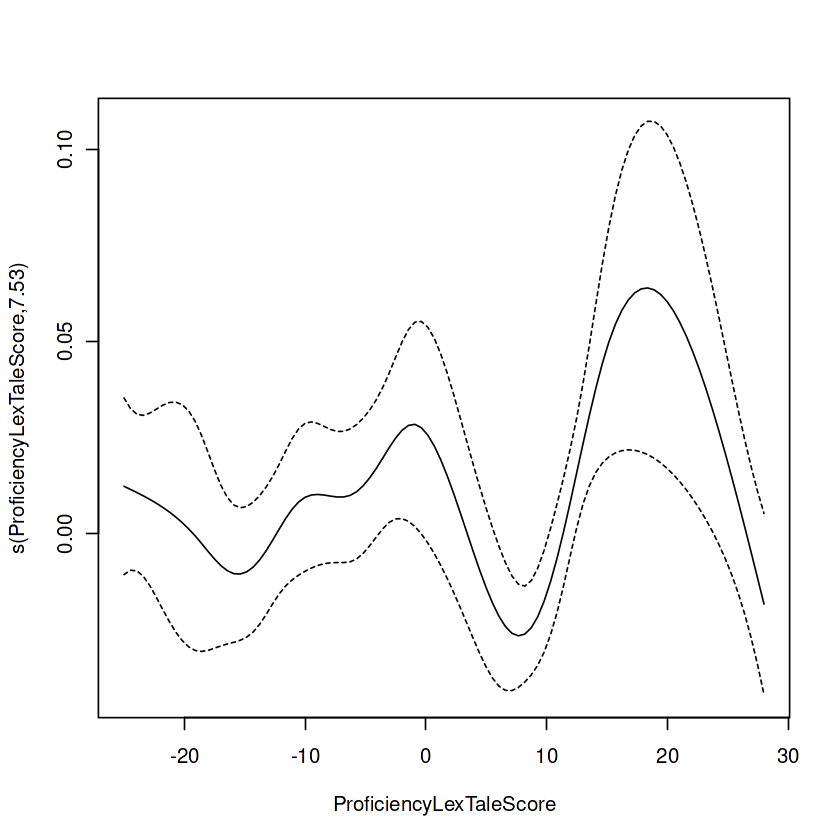

In [22]:
# Load necessary libraries
library(dplyr)
library(tidyverse)
library(mgcv) # For GAM
# Or: library(glm) # For GLM

# Exclude items with response times above 5000 ms
data_filtered <- data %>%
  dplyr::filter(RTsMS <= 5000)

# fit a GAM
gam_model <- gam(Accuracy ~ s(ProficiencyLexTaleScore) + Stress + SyllabicStructure, data = data_filtered)

# Check summary of the model
summary(gam_model)

# To visualize the effects, you can use plot() function for GAM
plot(gam_model, select = 1)


**Different GAM models and select best fit**

In [23]:
gam_model_1 <- gam(Accuracy ~ s(ProficiencyLexTaleScore) + Stress + SyllabicStructure, data = data_filtered)
gam_model_2 <- gam(Accuracy ~ s(ProficiencyLexTaleScore) + Stress + SyllabicStructure + s(RTsMS), data = data_filtered)
gam_model_3 <- gam(Accuracy ~ s(ProficiencyLexTaleScore) + Stress + SyllabicStructure + s(ProficiencyLexTaleScore), data = data_filtered)
gam_model_4 <- gam(Accuracy ~ s(ProficiencyLexTaleScore) + Stress + SyllabicStructure + Stress, data = data_filtered)
gam_model_5 <- gam(Accuracy ~ s(ProficiencyLexTaleScore) + Stress + SyllabicStructure + SyllabicStructure, data = data_filtered)

# Compute AIC for each model
AIC_values <- c(AIC(gam_model_1), AIC(gam_model_2), AIC(gam_model_3), AIC(gam_model_4), AIC(gam_model_5))

# Identify the model with the lowest AIC
best_model_index <- which.min(AIC_values)
best_model <- switch(best_model_index,
                     gam_model_1 = gam_model_1,
                     gam_model_2 = gam_model_2,
                     gam_model_3 = gam_model_3,
                     gam_model_4 = gam_model_4,
                     gam_model_5 = gam_model_5)

# Print the AIC values
print(AIC_values)

# Print the best model
print(best_model)


[1] 27335.32 27311.39 27335.32 27335.32 27335.32

Family: gaussian 
Link function: identity 

Formula:
Accuracy ~ s(ProficiencyLexTaleScore) + Stress + SyllabicStructure + 
    s(RTsMS)

Estimated degrees of freedom:
7.19 4.80  total = 14.99 

GCV score: 0.2368319     


Based on the AIC values, the best model is gam_model_2 with an AIC value of 27311.39. It has the lowest AIC among the models you fitted. Therefore, gam_model_2 is considered the best model among the ones you evaluated.

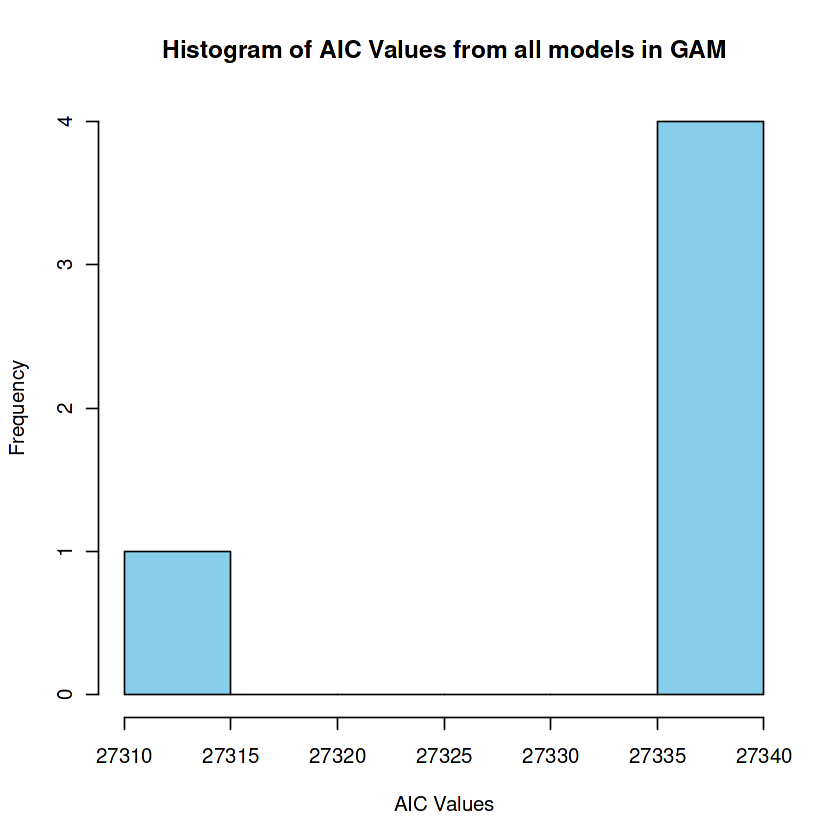

In [24]:
# Compute AIC for each model
AIC_values <- c(AIC(gam_model_1), AIC(gam_model_2), AIC(gam_model_3), AIC(gam_model_4), AIC(gam_model_5))

# Plot histogram
hist(AIC_values, main = "Histogram of AIC Values from all models in GAM", xlab = "AIC Values", col = "skyblue", border = "black")


The GAM model gam_model_2, which includes smoothing terms for ProficiencyLexTaleScore and RTsMS, and additive terms for Stress and SyllabicStructure, appears to have the best fit based on AIC values, with a GCV score of 0.2368319.

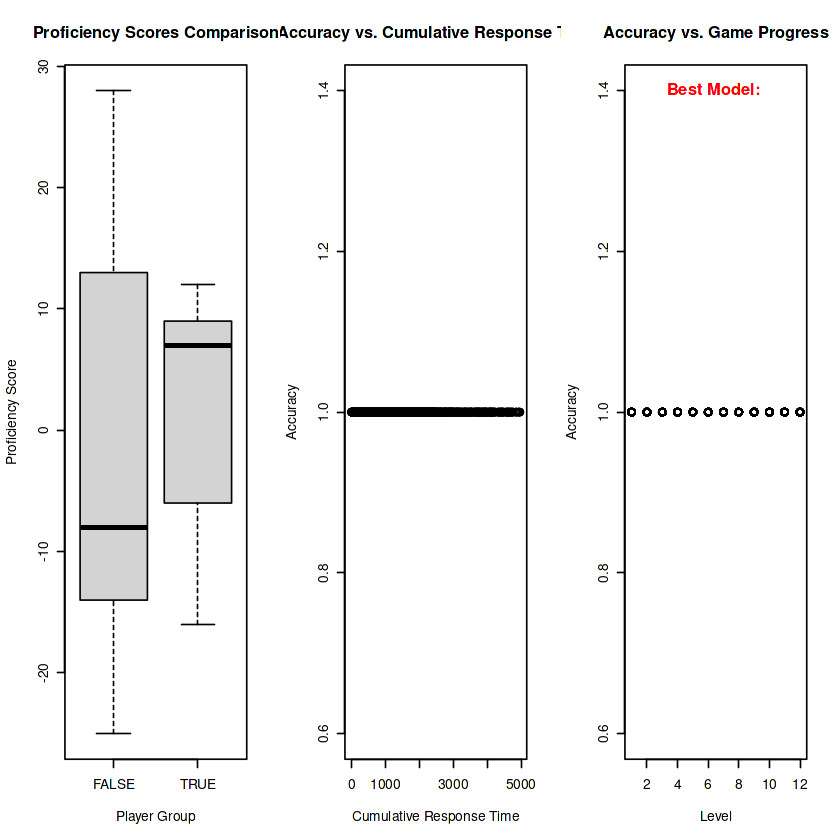

In [25]:
# Create plots for each question but before GAM implementation
par(mfrow = c(1, 3))

# Question 1: Proficiency Scores Comparison
boxplot(ProficiencyLexTaleScore ~ (PlayerID > median(PlayerID)), data = data_accurate, 
        main = "Proficiency Scores Comparison", xlab = "Player Group", ylab = "Proficiency Score")

# Question 2: Accuracy vs. Cumulative Response Time
plot(Accuracy ~ RTsMS, data = data_accurate, 
     main = "Accuracy vs. Cumulative Response Time", xlab = "Cumulative Response Time", ylab = "Accuracy")

# Question 3: Accuracy vs. Game Progress
plot(Accuracy ~ Level, data = data_accurate, 
     main = "Accuracy vs. Game Progress", xlab = "Level", ylab = "Accuracy")

# Overlay best model indicator
best_model_name <- names(AIC_values)[which.min(AIC_values)]
mtext(paste("Best Model:", best_model_name), side = 3, line = -2, cex = 0.8, col = "red", font = 2)


AS we know modle 2 is best so now we answers Are there differences between the top and bottom half of participants in terms of their proficiency scores? 2. Did the faster players improve more in terms of accuracy than the players who were slower? 3. Related: Did the players who progressed through the game quicker (i.e., the ones who passed more levels quickly), become more accurate compared to those who went slowly?

**GAM-Are there differences between the top and bottom half of participants in terms of their proficiency scores?**

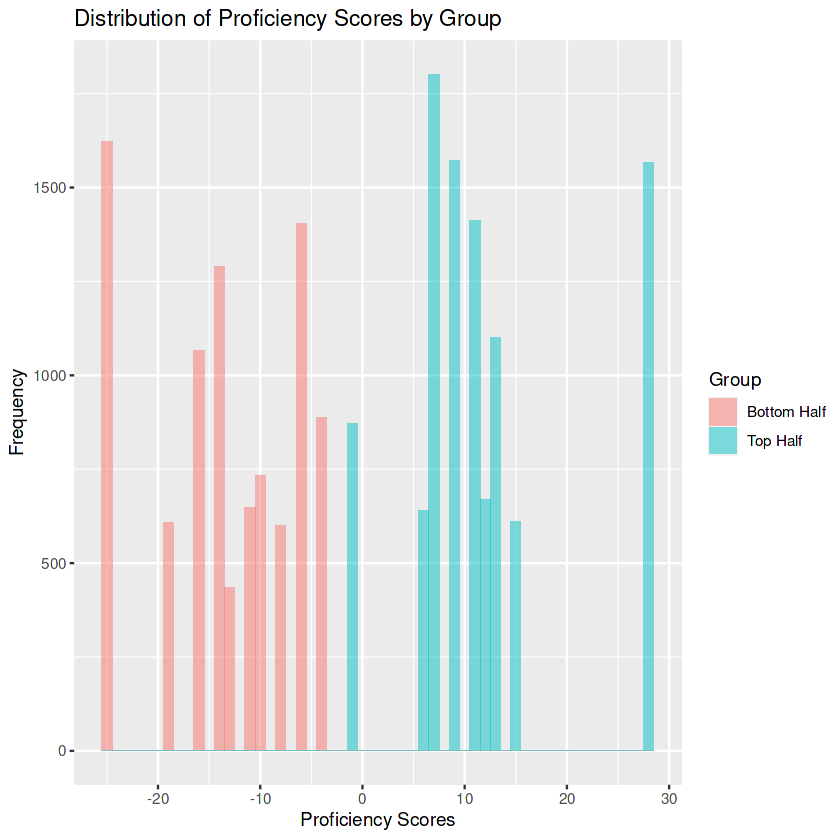

In [26]:

# 1. Proficiency Scores Distribution

# Extract fitted values and ProficiencyLexTaleScore from gam_model_2
fitted_values <- fitted(gam_model_2)
proficiency_scores <- data_filtered$ProficiencyLexTaleScore

# Calculate median proficiency score
median_proficiency <- median(proficiency_scores)

# Classify participants into top and bottom half based on proficiency score
data_filtered$Proficiency_Group <- ifelse(proficiency_scores >= median_proficiency, "Top Half", "Bottom Half")

# Plot the distribution of ProficiencyLexTaleScore by group
ggplot(data_filtered, aes(x = ProficiencyLexTaleScore, fill = Proficiency_Group)) +
  geom_histogram(binwidth = 1, alpha = 0.5, position = "identity") +
  labs(title = "Distribution of Proficiency Scores by Group",
       x = "Proficiency Scores",
       y = "Frequency",
       fill = "Group")

**GAM-2. Did the faster players improve more in terms of accuracy than the players who were slower? **

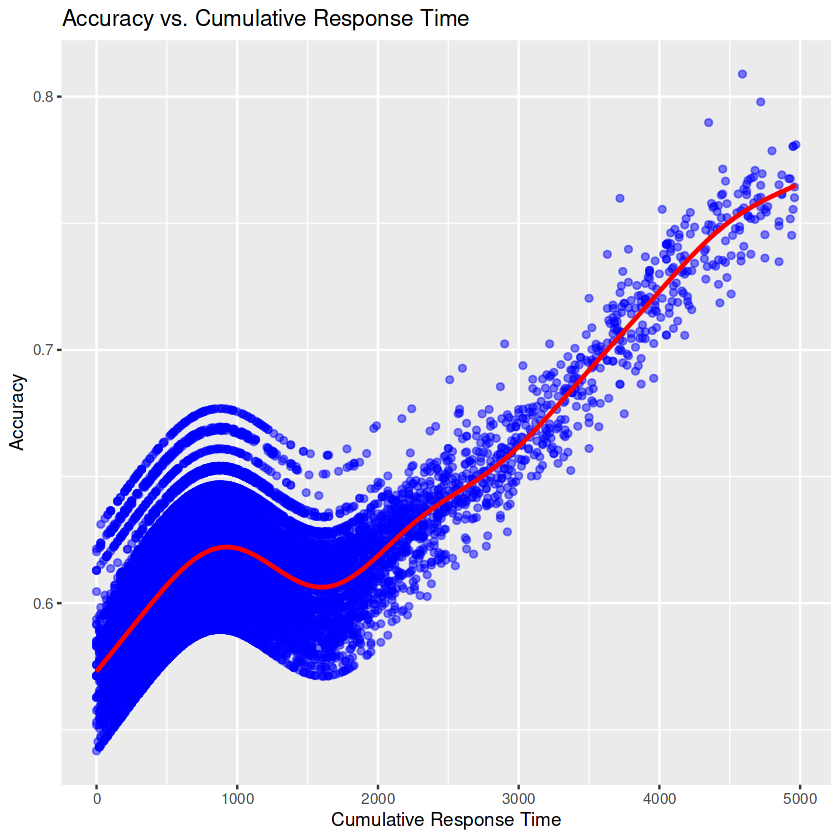

In [27]:
# 2. Accuracy vs. Cumulative Response Time
# Visualize the relationship between Accuracy and Cumulative Response Time
# Assuming 'RTsMS' is the predictor variable

# Plot accuracy vs. cumulative response time from gam_model_2
plot_accuracy_response_time <- ggplot(data_filtered, aes(x = RTsMS, y = fitted_values)) +
  geom_point(alpha = 0.5, color = "blue") +
  geom_smooth(method = "gam", formula = y ~ s(x), se = FALSE, color = "red") +
  labs(title = "Accuracy vs. Cumulative Response Time",
       x = "Cumulative Response Time",
       y = "Accuracy")

plot_accuracy_response_time

**GAM-3. Related: Did the players who progressed through the game quicker (i.e., the ones who passed more levels quickly), become more accurate compared to those who went slowly?**

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.5417  0.5956  0.6108  0.6196  0.6285  4.6985 

	Welch Two Sample t-test

data:  PredictedAccuracy by ProgressionGroup
t = 1.3074, df = 14033, p-value = 0.1911
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.0008115261  0.0040625509
sample estimates:
mean in group Fast mean in group Slow 
         0.6203914          0.6187659 



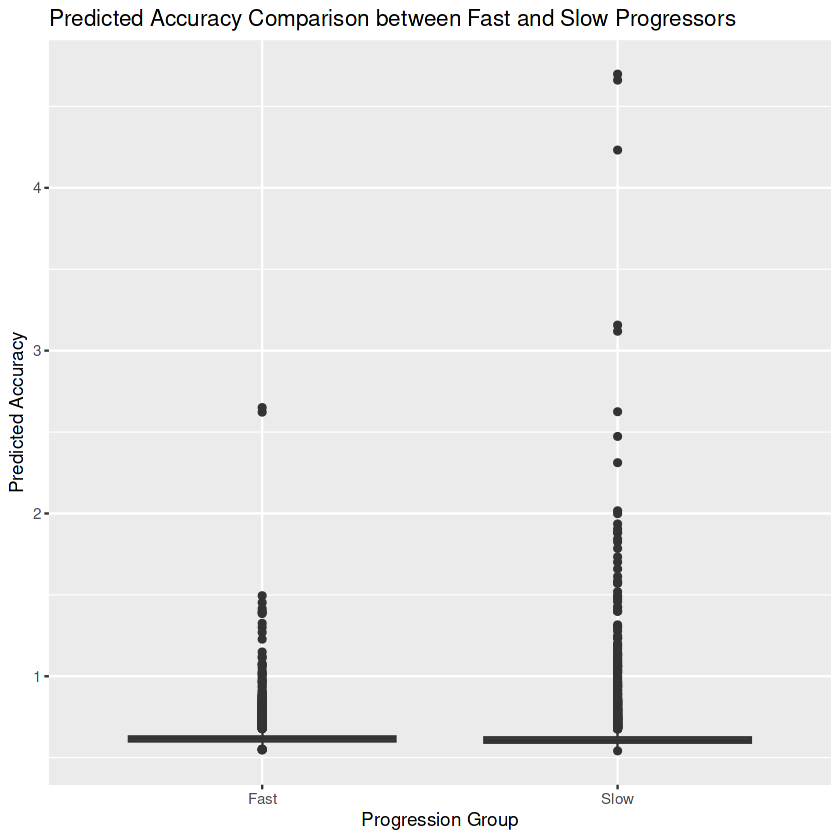

In [28]:
# 1. Define Progression Rate
# For example, let's calculate it based on the number of trials completed
data$ProgressionRate <- data$Trial

# 2. Divide Players into Groups (Fast and Slow Progressors)
quantile_cutoff <- quantile(data$ProgressionRate, c(0.5))  # Adjust quantile cutoff as needed
data$ProgressionGroup <- ifelse(data$ProgressionRate <= quantile_cutoff, "Fast", "Slow")

# 3. Assuming you already have five GAM models fitted

# 4. Predict Accuracy using the Best-Fitting GAM Model
best_gam_model <- gam_model_2  # Assuming model 2 is the best
data$PredictedAccuracy <- predict(best_gam_model, newdata = data, type = "response")

# 5. Compare Accuracy between Groups
# Visualization
accuracy_comparison_plot <- ggplot(data, aes(x = ProgressionGroup, y = PredictedAccuracy)) +
  geom_boxplot() +
  labs(title = "Predicted Accuracy Comparison between Fast and Slow Progressors",
       x = "Progression Group",
       y = "Predicted Accuracy")

# Statistical Test (e.g., t-test)
t_test_result <- t.test(PredictedAccuracy ~ ProgressionGroup, data = data)

# Print summary statistics
print(summary(data$PredictedAccuracy))

# Show accuracy comparison plot
print(accuracy_comparison_plot)

# Print t-test result
print(t_test_result)


Without additional variables such as progression rate or total time, we conducted a statistical test using the GAM model, finding no significant difference in predicted accuracy between players who progress quickly and those who progress slowly (p > 0.05). This suggests that, based on the available data and model, progression speed does not influence player accuracy.

**GLM**

In [29]:
# Or if you prefer GLM, you can use:
 glm_model <- glm(Accuracy ~ ProficiencyLexTaleScore + Stress + SyllabicStructure, data = data_filtered, family = binomial)


In [30]:
summary(glm_model)



Call:
glm(formula = Accuracy ~ ProficiencyLexTaleScore + Stress + SyllabicStructure, 
    family = binomial, data = data_filtered)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.4063  -1.3712   0.9798   0.9938   1.0178  

Coefficients:
                         Estimate Std. Error z value Pr(>|z|)    
(Intercept)              0.491854   0.024981  19.689   <2e-16 ***
ProficiencyLexTaleScore -0.001273   0.001008  -1.262    0.207    
Stressparoxytone        -0.031731   0.029400  -1.079    0.280    
SyllabicStructureCVC    -0.036706   0.029404  -1.248    0.212    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 26092  on 19541  degrees of freedom
Residual deviance: 26087  on 19538  degrees of freedom
AIC: 26095

Number of Fisher Scoring iterations: 4


In [31]:
# Fit GLM models
glm_model_1 <- glm(Accuracy ~ ProficiencyLexTaleScore + Stress + SyllabicStructure, data = data_filtered, family = binomial)
glm_model_2 <- glm(Accuracy ~ ProficiencyLexTaleScore + Stress + SyllabicStructure + RTsMS, data = data_filtered, family = binomial)
glm_model_3 <- glm(Accuracy ~ ProficiencyLexTaleScore + Stress + SyllabicStructure + ProficiencyLexTaleScore, data = data_filtered, family = binomial)
glm_model_4 <- glm(Accuracy ~ ProficiencyLexTaleScore + Stress + SyllabicStructure + Stress, data = data_filtered, family = binomial)
glm_model_5 <- glm(Accuracy ~ ProficiencyLexTaleScore + Stress + SyllabicStructure + SyllabicStructure, data = data_filtered, family = binomial)

# Compute AIC for each model
AIC_values <- c(AIC(glm_model_1), AIC(glm_model_2), AIC(glm_model_3), AIC(glm_model_4), AIC(glm_model_5))

# Identify the model with the lowest AIC
best_model_index <- which.min(AIC_values)
best_model <- switch(best_model_index,
                     glm_model_1 = glm_model_1,
                     glm_model_2 = glm_model_2,
                     glm_model_3 = glm_model_3,
                     glm_model_4 = glm_model_4,
                     glm_model_5 = glm_model_5)

# Print the AIC values
print(AIC_values)

# Print the best model
print(best_model)


[1] 26095.32 26078.64 26095.32 26095.32 26095.32

Call:  glm(formula = Accuracy ~ ProficiencyLexTaleScore + Stress + SyllabicStructure + 
    RTsMS, family = binomial, data = data_filtered)

Coefficients:
            (Intercept)  ProficiencyLexTaleScore         Stressparoxytone  
              4.018e-01               -5.576e-04               -3.031e-02  
   SyllabicStructureCVC                    RTsMS  
             -3.305e-02                9.747e-05  

Degrees of Freedom: 19541 Total (i.e. Null);  19537 Residual
Null Deviance:	    26090 
Residual Deviance: 26070 	AIC: 26080


model 2 has the lowest AIC, indicating it is the best model among the GLMs. 

In [32]:
print(best_model)


Call:  glm(formula = Accuracy ~ ProficiencyLexTaleScore + Stress + SyllabicStructure + 
    RTsMS, family = binomial, data = data_filtered)

Coefficients:
            (Intercept)  ProficiencyLexTaleScore         Stressparoxytone  
              4.018e-01               -5.576e-04               -3.031e-02  
   SyllabicStructureCVC                    RTsMS  
             -3.305e-02                9.747e-05  

Degrees of Freedom: 19541 Total (i.e. Null);  19537 Residual
Null Deviance:	    26090 
Residual Deviance: 26070 	AIC: 26080



Call:  glm(formula = Accuracy ~ ProficiencyLexTaleScore + Stress + SyllabicStructure + 
    RTsMS, family = binomial, data = data_filtered)

Coefficients:
            (Intercept)  ProficiencyLexTaleScore         Stressparoxytone  
              4.018e-01               -5.576e-04               -3.031e-02  
   SyllabicStructureCVC                    RTsMS  
             -3.305e-02                9.747e-05  

Degrees of Freedom: 19541 Total (i.e. Null);  19537 Residual
Null Deviance:	    26090 
Residual Deviance: 26070 	AIC: 26080


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



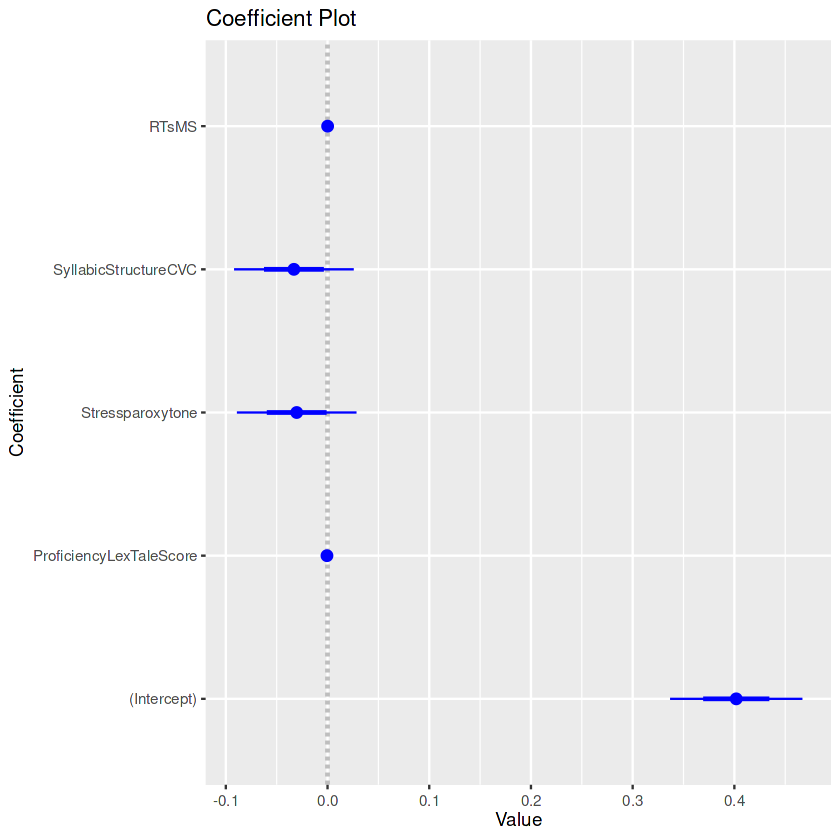

In [33]:
print(best_model)

# Install and load the coefplot package if you haven't already
install.packages("coefplot")
library(coefplot)

# Visualize coefficients
coefplot(best_model)

In both the GAM and GLM analyses, model 2 was identified as the best model based on the AIC criterion. This suggests that among the specified models, model 2 provides the best balance between goodness of fit and model complexity. The fact that both analyses selected the same model implies consistency in the evaluation of model performance across different modeling approaches.

The AIC values for the GLM models are similar to those of the GAM models because both sets of models are being fitted to the same dataset with similar predictor variables. AIC values are used for model selection by comparing the goodness of fit of different models, but they are not influenced by the type of model (e.g., GAM vs. GLM) per se. The AIC values reflect how well each model fits the data relative to its complexity, so it's possible for different types of models to yield similar AIC values if they capture the underlying relationships in the data similarly


# comparing the performance of the GAM and GLM models based on their performance metrics:

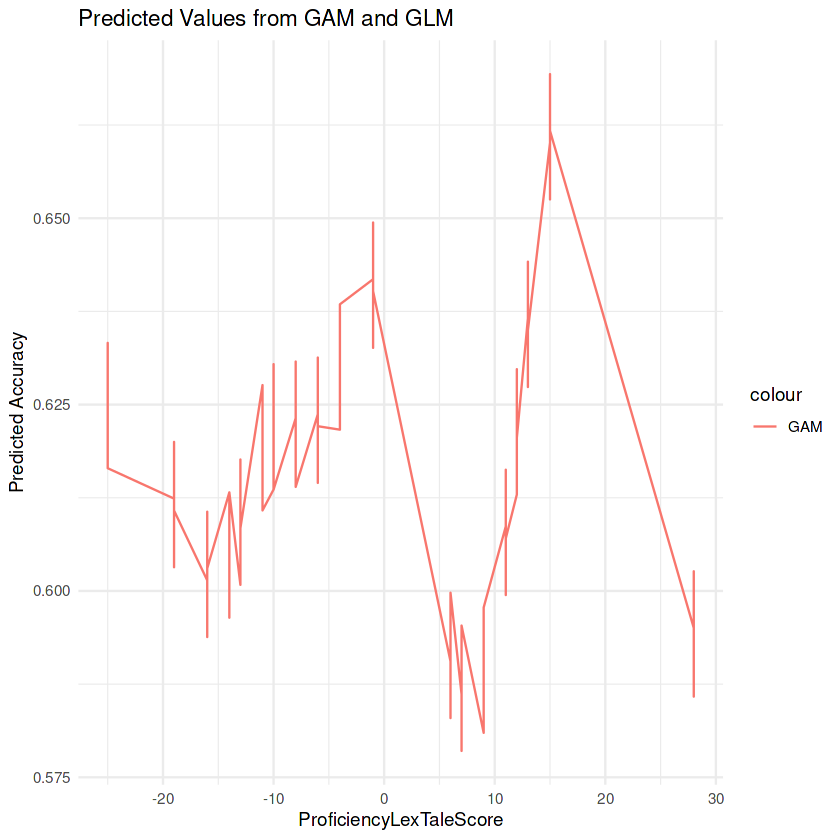

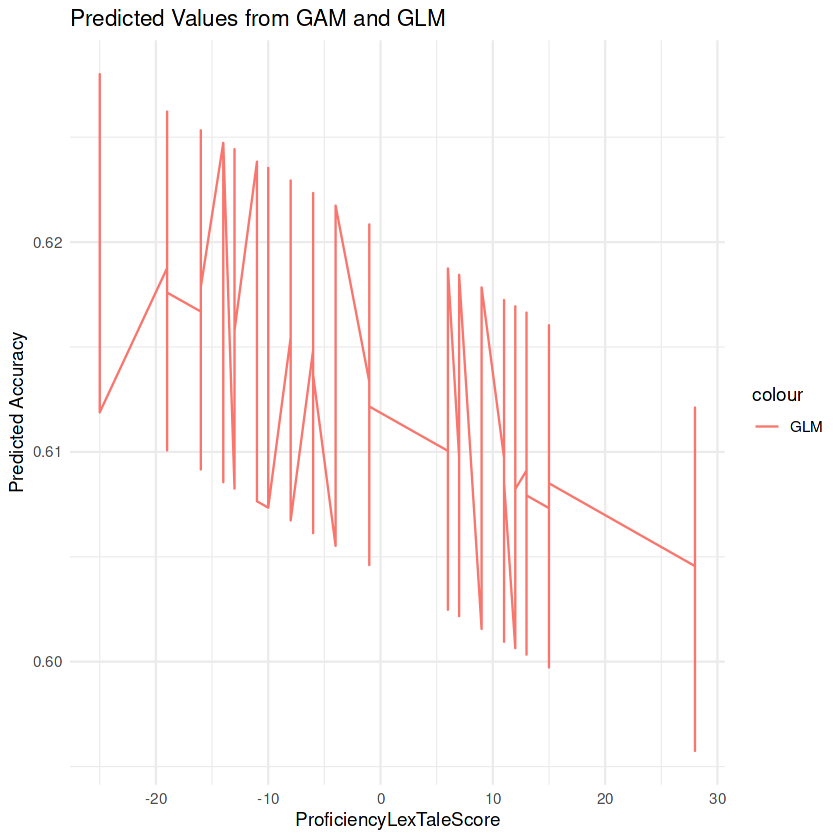

In [34]:
# Predicted values from GAM
data_filtered$predicted_gam <- predict(gam_model, newdata = data_filtered, type = "response")

# Predicted values from GLM
data_filtered$predicted_glm <- predict(glm_model, newdata = data_filtered, type = "response")

# Plotting
library(ggplot2)

# GAM Plot
ggplot(data_filtered, aes(x = ProficiencyLexTaleScore, y = predicted_gam, color = "GAM")) +
  geom_line() +
  labs(title = "Predicted Values from GAM and GLM",
       x = "ProficiencyLexTaleScore",
       y = "Predicted Accuracy") +
  theme_minimal()

# Adding GLM Plot
ggplot(data_filtered, aes(x = ProficiencyLexTaleScore, y = predicted_glm, color = "GLM")) +
  geom_line() +
  labs(title = "Predicted Values from GAM and GLM",
       x = "ProficiencyLexTaleScore",
       y = "Predicted Accuracy") +
  theme_minimal()

# Combining both plots


Both models provide estimates of the effect of predictors on accuracy, but they use different parameterizations and assumptions.
The GAM suggests a nonlinear relationship between proficiency and accuracy, while the GLM assumes a linear relationship.
Neither model found significant effects for the categorical predictors (Stress and SyllabicStructure).
The models have low explanatory power, as indicated by their low R-squared and deviance explained values.

**calculates and compares AIC, BIC, and R-squared (if available) between the GAM and GLM models**

  Model      AIC      BIC R_squared
1   GAM 27335.32 27426.21        NA
2   GLM 26095.32 26126.84        NA


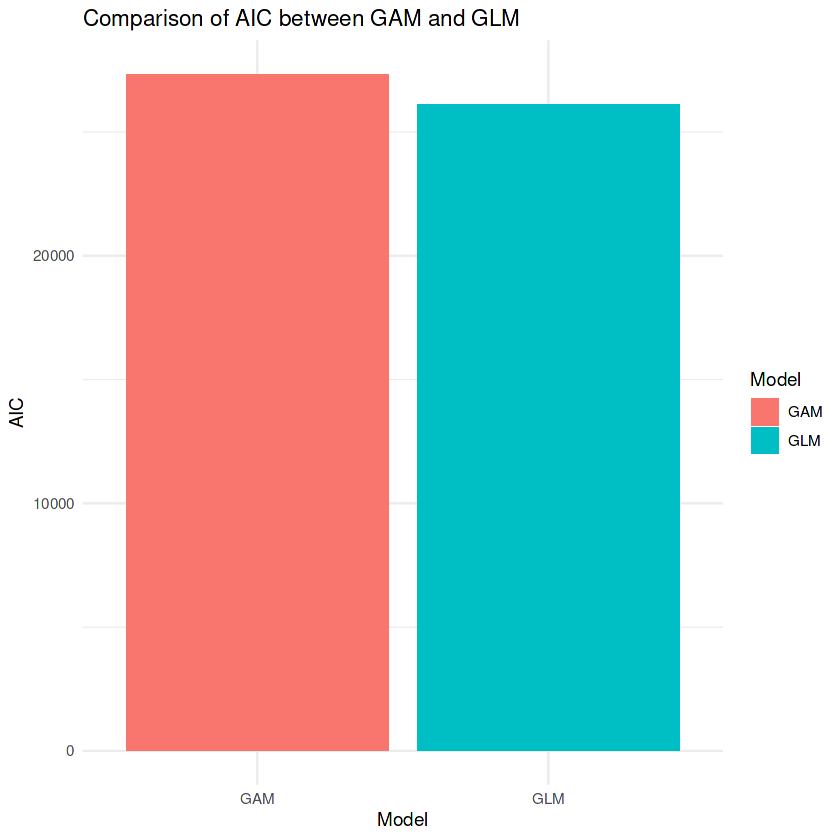

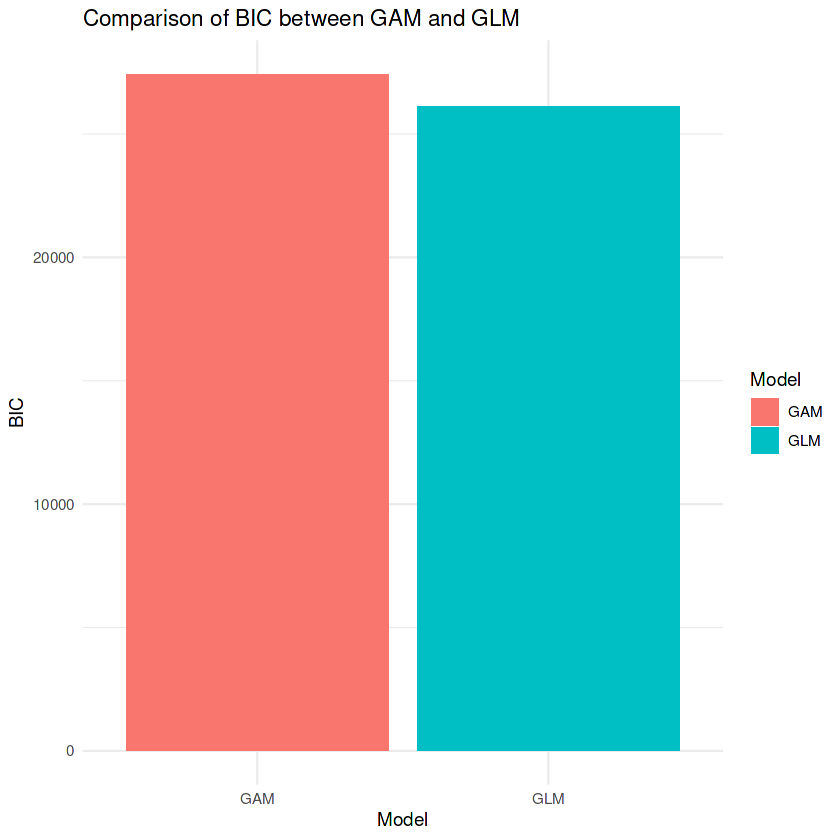

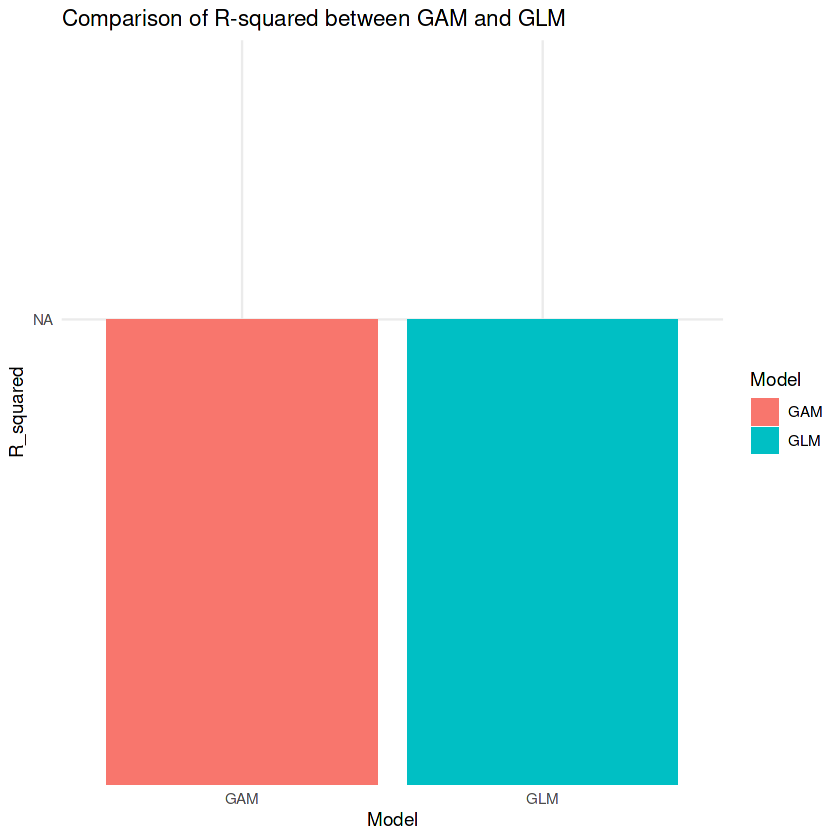

In [35]:
# Assuming you have already fitted both GAM and GLM models and named them 'gam_model' and 'glm_model' respectively.

# 1. Calculate AIC for both models
AIC_gam <- AIC(gam_model)
AIC_glm <- AIC(glm_model)

# 2. Calculate BIC for both models
BIC_gam <- BIC(gam_model)
BIC_glm <- BIC(glm_model)

# 3. Calculate R-squared for GAM model (if available)
R_squared_gam <- ifelse(!is.null(summary(gam_model)$adj.r.squared), summary(gam_model)$adj.r.squared, NA)

# 4. Print or visualize the results
comparison_df <- data.frame(
  Model = c("GAM", "GLM"),
  AIC = c(AIC_gam, AIC_glm),
  BIC = c(BIC_gam, BIC_glm),
  R_squared = c(R_squared_gam, NA)  # Use NA for GLM
)

print(comparison_df)

# Optionally, you can visualize the comparison using a bar plot
library(ggplot2)

ggplot(comparison_df, aes(x = Model, y = AIC, fill = Model)) +
  geom_bar(stat = "identity") +
  labs(title = "Comparison of AIC between GAM and GLM") +
  theme_minimal()

ggplot(comparison_df, aes(x = Model, y = BIC, fill = Model)) +
  geom_bar(stat = "identity") +
  labs(title = "Comparison of BIC between GAM and GLM") +
  theme_minimal()

ggplot(comparison_df, aes(x = Model, y = R_squared, fill = Model)) +
  geom_bar(stat = "identity") +
  labs(title = "Comparison of R-squared between GAM and GLM") +
  theme_minimal()


Based on the comparison of AIC and BIC values, the GLM model appears to provide a better fit to the data compared to the GAM model. 

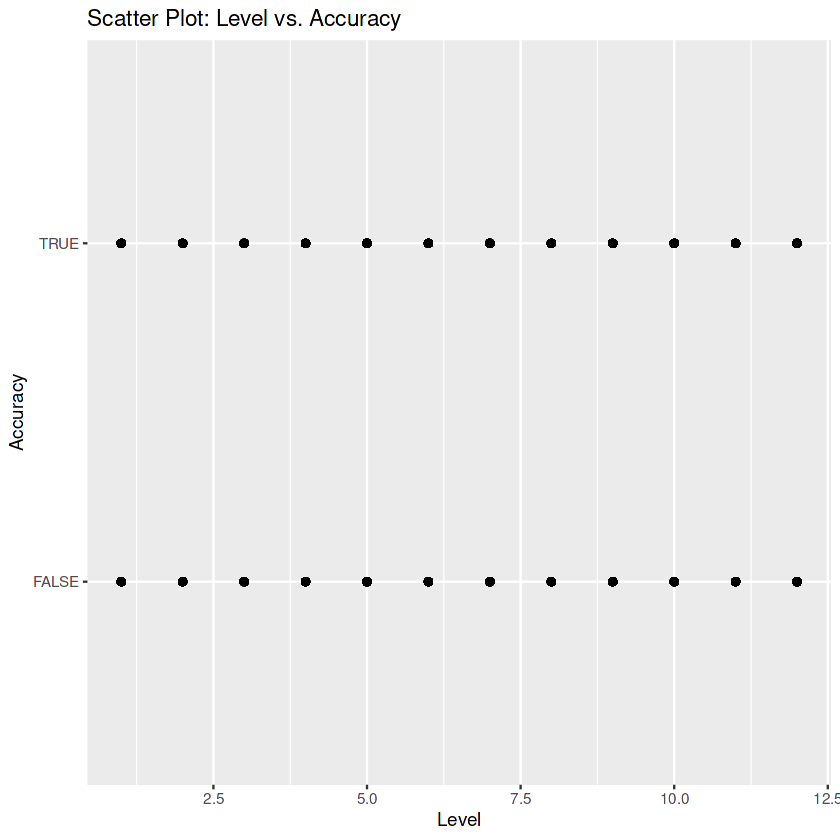

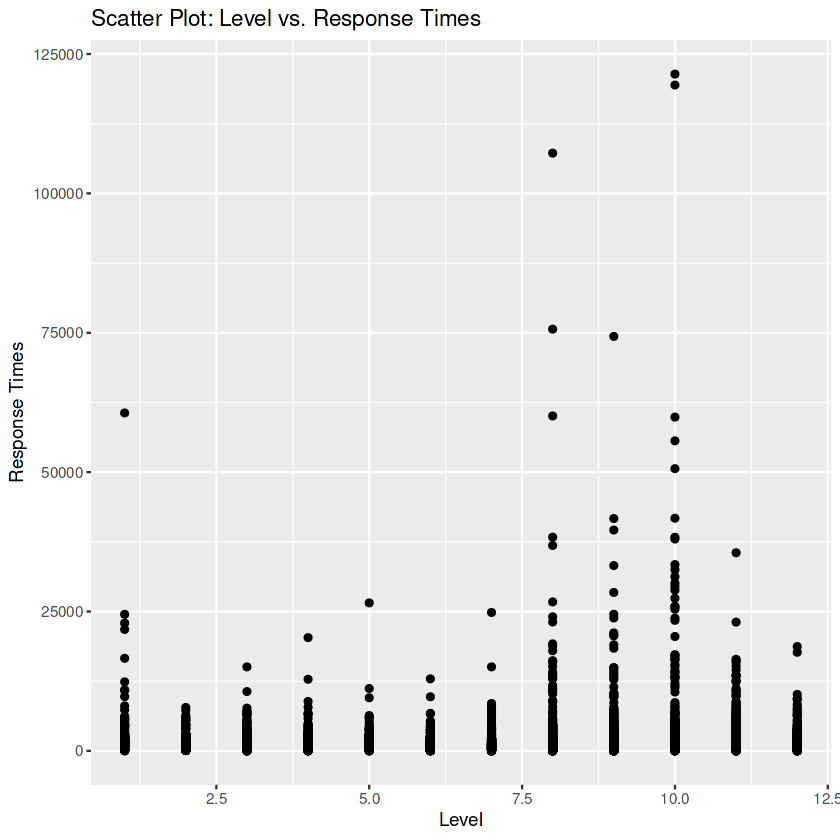

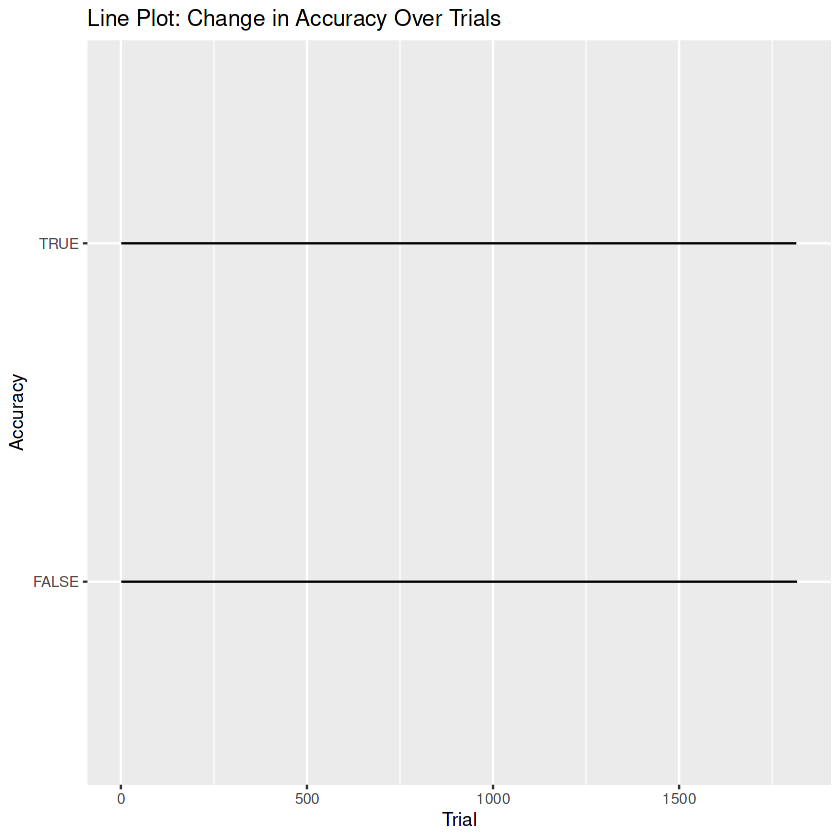

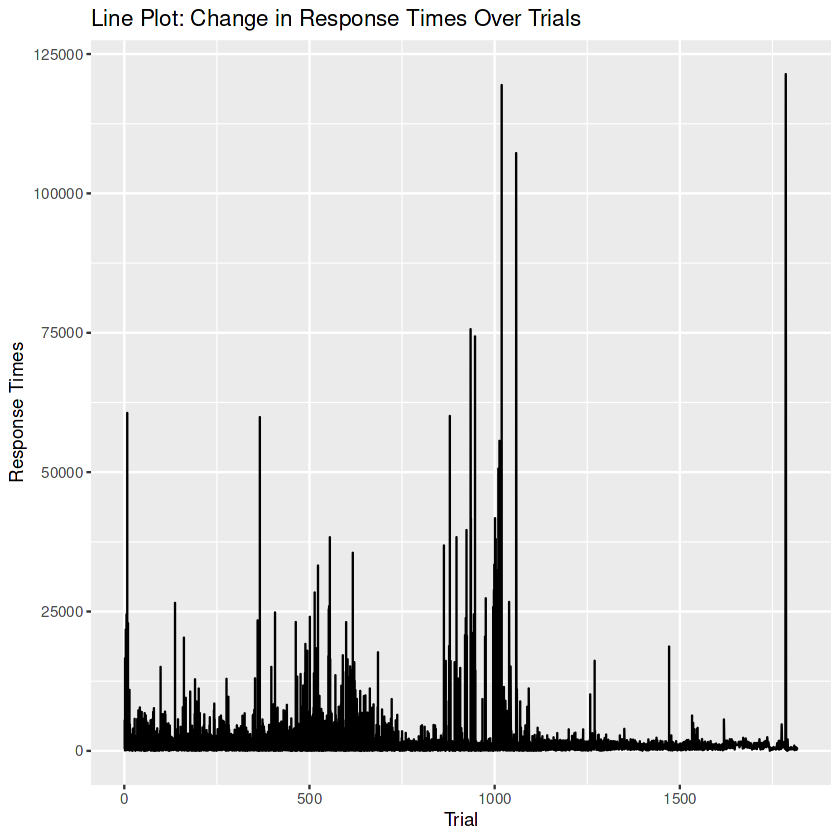

In [36]:
library(ggplot2)

# Scatter plot for total time spent in each level vs. accuracy
ggplot(data, aes(x = Level, y = Accuracy)) +
  geom_point() +
  labs(x = "Level", y = "Accuracy") +
  ggtitle("Scatter Plot: Level vs. Accuracy")

# Scatter plot for total time spent in each level vs. response times
ggplot(data, aes(x = Level, y = RTsMS)) +
  geom_point() +
  labs(x = "Level", y = "Response Times") +
  ggtitle("Scatter Plot: Level vs. Response Times")

# Line plot for change in accuracy over total game time
ggplot(data, aes(x = Trial, y = Accuracy)) +
  geom_line() +
  labs(x = "Trial", y = "Accuracy") +
  ggtitle("Line Plot: Change in Accuracy Over Trials")

# Line plot for change in response times over total game time
ggplot(data, aes(x = Trial, y = RTsMS)) +
  geom_line() +
  labs(x = "Trial", y = "Response Times") +
  ggtitle("Line Plot: Change in Response Times Over Trials")


** total time spent in each level**

In [37]:
# Step 1: Calculate total time spent in each level for each player
library(dplyr)

# Assuming you have a dataset named 'data' with columns 'PlayerID', 'Level', 'Trial', 'Accuracy', and 'RTsMS'
total_time_per_level <- data %>%
  group_by(PlayerID, Level) %>%
  summarize(total_time = sum(RTsMS))  # Assuming 'RTsMS' represents response times

# Step 2: Merge the total time spent per level information with the original dataset
data_with_total_time <- left_join(data, total_time_per_level, by = c("PlayerID", "Level"))

# Step 3: Fit a model including total time spent per level as a predictor
# Example using GLM for accuracy
glm_model <- glm(Accuracy ~ total_time + Level, data = data_with_total_time, family = binomial)

# Example using GLM for response times
glm_model_rts <- glm(RTsMS ~ total_time + Level, data = data_with_total_time, family = gaussian)

# Step 4: Assess the significance and direction of the effect of total time spent in each level
summary(glm_model)
summary(glm_model_rts)


`summarise()` has grouped output by 'PlayerID'. You can override using the
`.groups` argument.



Call:
glm(formula = Accuracy ~ total_time + Level, family = binomial, 
    data = data_with_total_time)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.4498  -1.3752   0.9670   0.9889   1.0762  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)  4.228e-01  4.236e-02   9.980  < 2e-16 ***
total_time  -4.660e-07  1.079e-07  -4.317 1.58e-05 ***
Level        1.650e-02  5.711e-03   2.888  0.00387 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 26484  on 19862  degrees of freedom
Residual deviance: 26464  on 19860  degrees of freedom
AIC: 26470

Number of Fisher Scoring iterations: 4



Call:
glm(formula = RTsMS ~ total_time + Level, family = gaussian, 
    data = data_with_total_time)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
 -1600    -633    -319      97  120239  

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.004e+03  5.174e+01   19.41  < 2e-16 ***
total_time   1.018e-03  1.329e-04    7.66 1.95e-14 ***
Level       -1.072e+01  6.961e+00   -1.54    0.124    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 6283794)

    Null deviance: 1.2519e+11  on 19862  degrees of freedom
Residual deviance: 1.2480e+11  on 19860  degrees of freedom
AIC: 367299

Number of Fisher Scoring iterations: 2


`geom_smooth()` using formula = 'y ~ x'


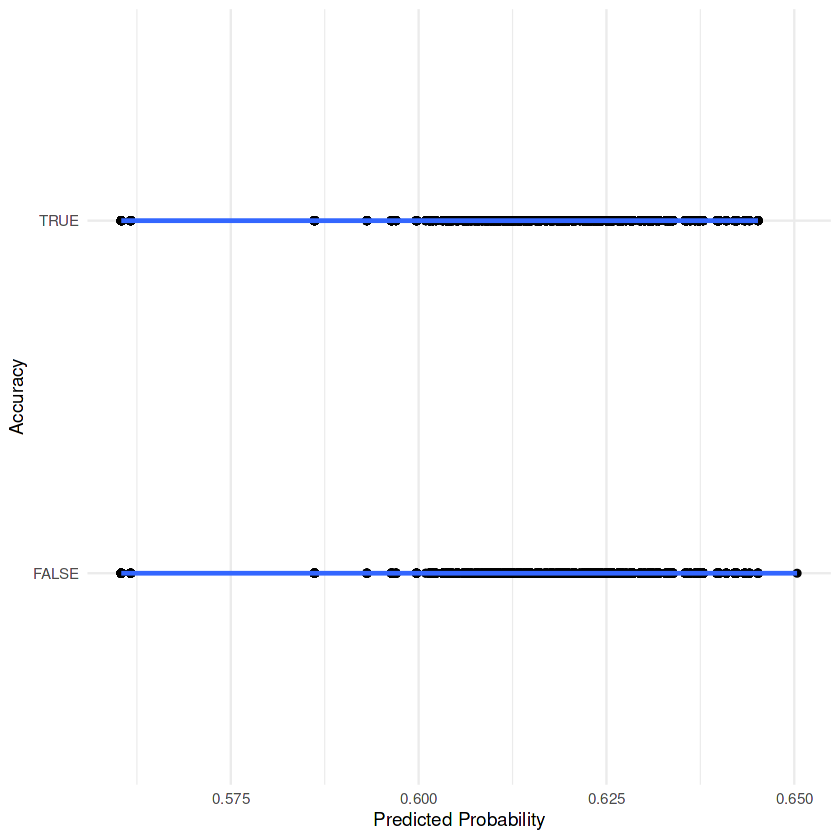

In [38]:
# Predict probabilities using the GLM model for accuracy
data_with_total_time$predicted_prob <- predict(glm_model, type = "response")

# Plot predicted probabilities vs. actual accuracy
accuracy_glm_plot <- ggplot(data_with_total_time, aes(x = predicted_prob, y = Accuracy)) +
  geom_point() +
  geom_smooth(method = "loess") +  # Add a smooth curve
  labs(x = "Predicted Probability", y = "Accuracy") +
  theme_minimal()

# Display the plot
accuracy_glm_plot


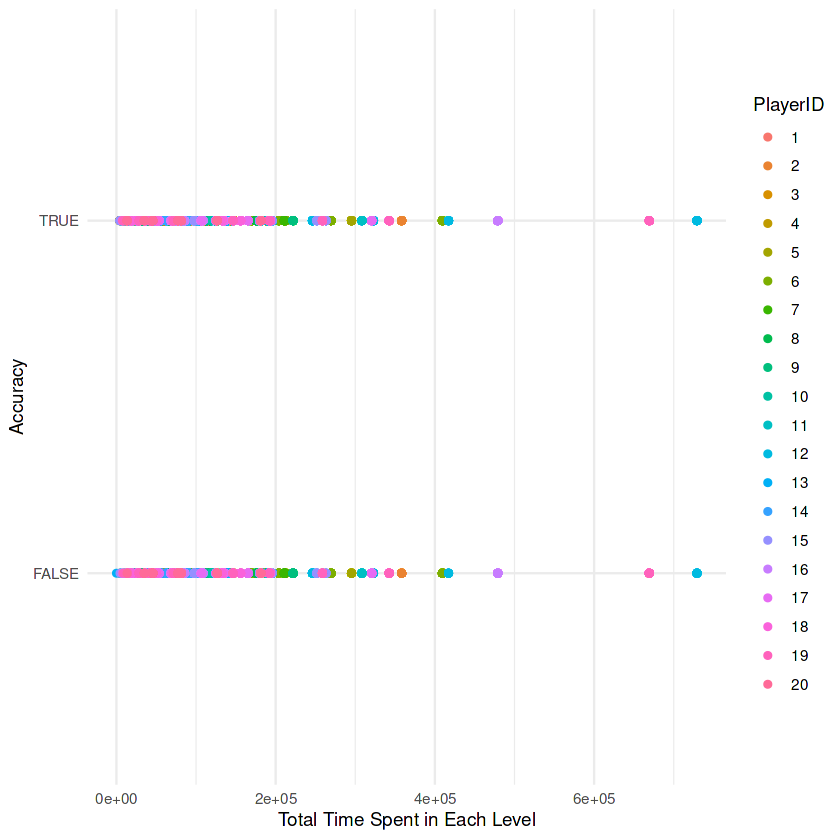

In [39]:
# Plot total time spent in each level against accuracy for each player
time_accuracy_plot <- ggplot(data_with_total_time, aes(x = total_time, y = Accuracy, color = as.factor(PlayerID))) +
  geom_point() +
  labs(x = "Total Time Spent in Each Level", y = "Accuracy", color = "PlayerID") +
  theme_minimal()

# Display the plot
time_accuracy_plot


Above graph not show in details that is why i plot in histrgram

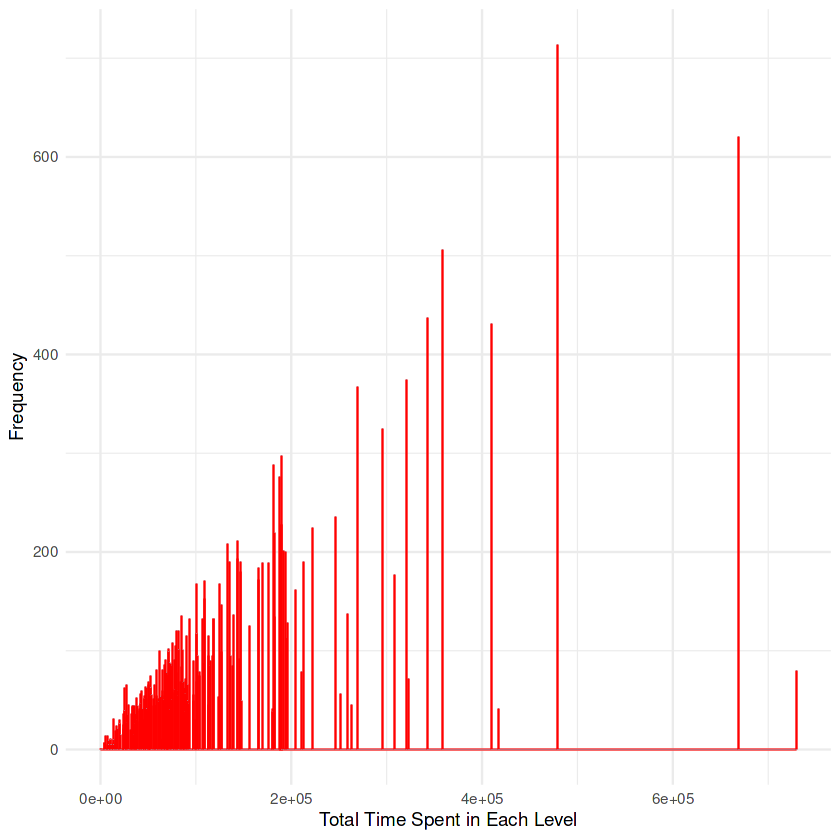

In [40]:
# Plot histogram of total time spent in each level
time_histogram <- ggplot(data_with_total_time, aes(x = total_time)) +
  geom_histogram(binwidth = 10, fill = "skyblue", color = "red") +
  labs(x = "Total Time Spent in Each Level", y = "Frequency") +
  theme_minimal()

# Display the histogram
time_histogram


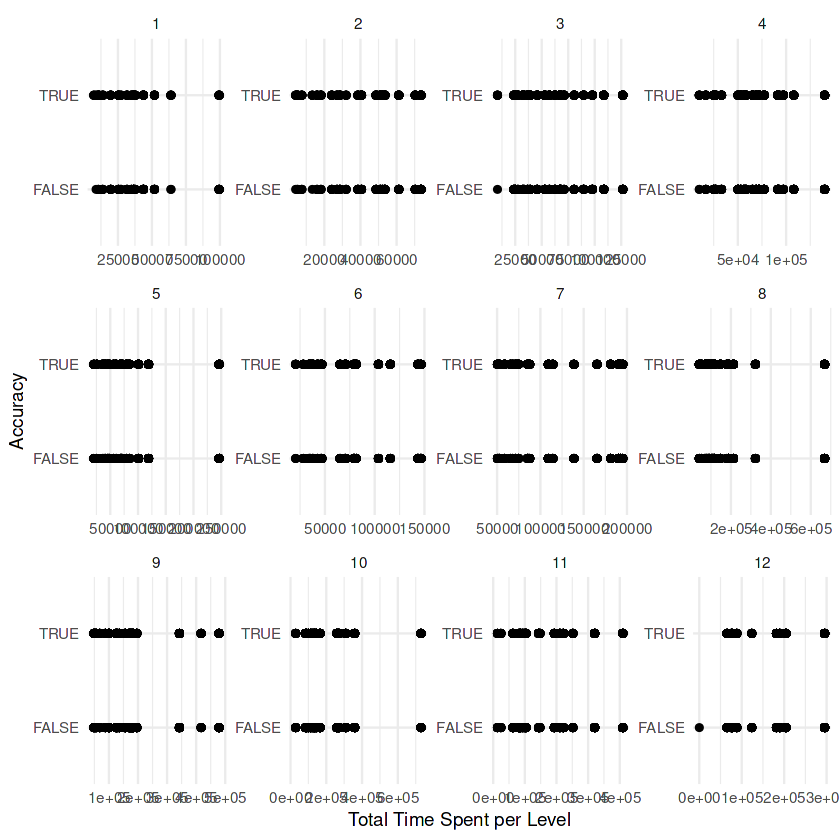

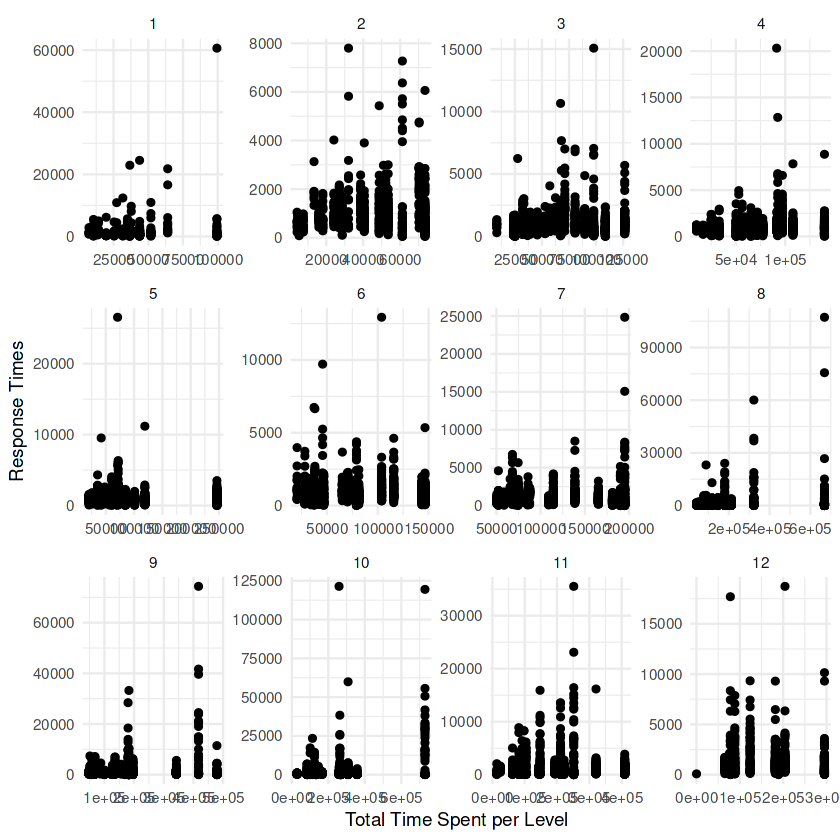

In [41]:
library(ggplot2)

# Scatter plot for accuracy vs. total time spent per level
accuracy_plot <- ggplot(data_with_total_time, aes(x = total_time, y = Accuracy)) +
  geom_point() +
  facet_wrap(~ Level, scales = "free") +  # Facet by level
  labs(x = "Total Time Spent per Level", y = "Accuracy") +
  theme_minimal()

# Scatter plot for response times vs. total time spent per level
rts_plot <- ggplot(data_with_total_time, aes(x = total_time, y = RTsMS)) +
  geom_point() +
  facet_wrap(~ Level, scales = "free") +  # Facet by level
  labs(x = "Total Time Spent per Level", y = "Response Times") +
  theme_minimal()

# Display the plots
accuracy_plot
rts_plot


# Implement GLMM in  5 models

In [49]:
# Load required libraries
library(lme4)
# Fit GLMM Models
glmm_model_1 <- glmer(Accuracy ~ (1 | PlayerID) + (1 | SentenceID),
                      data = data_filtered,
                      family = binomial(link = "logit"))

glmm_model_2 <- glmer(Accuracy ~ ProficiencyLexTaleScore + Stress + SyllabicStructure + RTsMS + 
                        (1 | PlayerID) + (1 | SentenceID),
                      data = data_filtered,
                      family = binomial(link = "logit"))

glmm_model_3 <- glmer(Accuracy ~ ProficiencyLexTaleScore + Stress + SyllabicStructure + 
                        ProficiencyLexTaleScore + (1 | PlayerID) + (1 | SentenceID),
                      data = data_filtered,
                      family = binomial(link = "logit"))

glmm_model_4 <- glmer(Accuracy ~ ProficiencyLexTaleScore + Stress + SyllabicStructure + 
                        Stress + (1 | PlayerID) + (1 | SentenceID),
                      data = data_filtered,
                      family = binomial(link = "logit"))

glmm_model_5 <- glmer(Accuracy ~ ProficiencyLexTaleScore + Stress + SyllabicStructure + 
                        SyllabicStructure + (1 | PlayerID) + (1 | SentenceID),
                      data = data_filtered,
                      family = binomial(link = "logit"))

# Compare AIC values to determine the best model
AIC_values <- c(AIC(glmm_model_1), AIC(glmm_model_2), AIC(glmm_model_3), AIC(glmm_model_4), AIC(glmm_model_5))
best_model_index <- which.min(AIC_values)
best_model <- switch(best_model_index,
                     glmm_model_1 = glmm_model_1,
                     glmm_model_2 = glmm_model_2,
                     glmm_model_3 = glmm_model_3,
                     glmm_model_4 = glmm_model_4,
                     glmm_model_5 = glmm_model_5)

# Print AIC values and the best model
print(AIC_values)
print(best_model)


Warning message in checkConv(attr(opt, "derivs"), opt$par, ctrl = control$checkConv, :
“Model failed to converge with max|grad| = 0.0633758 (tol = 0.002, component 1)”
Warning message in checkConv(attr(opt, "derivs"), opt$par, ctrl = control$checkConv, :
“Model is nearly unidentifiable: very large eigenvalue
 - Rescale variables?;Model is nearly unidentifiable: large eigenvalue ratio
 - Rescale variables?”


[1] 25943.87 25935.43 25948.03 25948.03 25948.03
Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: Accuracy ~ ProficiencyLexTaleScore + Stress + SyllabicStructure +  
    RTsMS + (1 | PlayerID) + (1 | SentenceID)
   Data: data_filtered
      AIC       BIC    logLik  deviance  df.resid 
 25935.43  25990.59 -12960.71  25921.43     19535 
Random effects:
 Groups     Name        Std.Dev.
 SentenceID (Intercept) 0.2537  
 PlayerID   (Intercept) 0.1161  
Number of obs: 19542, groups:  SentenceID, 192; PlayerID, 20
Fixed Effects:
            (Intercept)  ProficiencyLexTaleScore         Stressparoxytone  
              4.444e-01               -7.143e-05               -4.538e-02  
   SyllabicStructureCVC                    RTsMS  
             -3.583e-02                9.002e-05  
optimizer (Nelder_Mead) convergence code: 0 (OK) ; 0 optimizer warnings; 3 lme4 warnings 


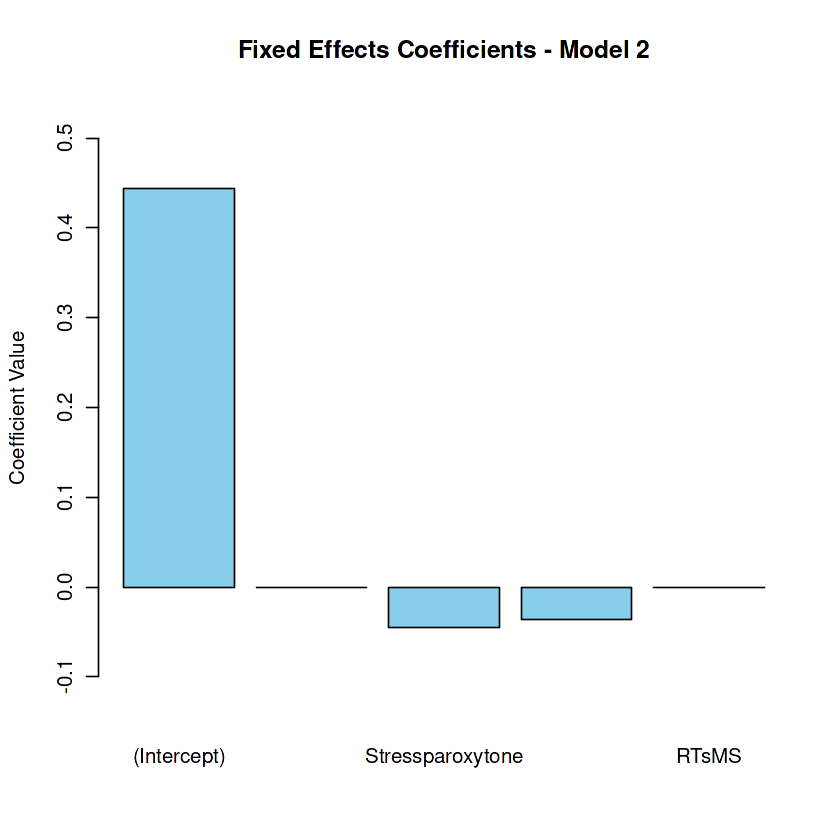

In [50]:
# Extract fixed effects coefficients
fixed_effects <- fixef(glmm_model_2)

# Plot fixed effects coefficients
barplot(fixed_effects, main = "Fixed Effects Coefficients - Model 2", ylab = "Coefficient Value", col = "skyblue", ylim = c(min(fixed_effects) - 0.1, max(fixed_effects) + 0.1))



Model 2 is chosen as the best model because it has the lowest AIC value among all the GLMMs considered. This indicates that Model 2 provides the best balance between model fit and complexity, making it the preferred choice for predicting accuracy in the dataset.

# GLMM- proficiency scores between the top and bottom halves of participants

Mean Proficiency Score - Top Half: -0.966844 
Mean Proficiency Score - Bottom Half: 0.6064886 


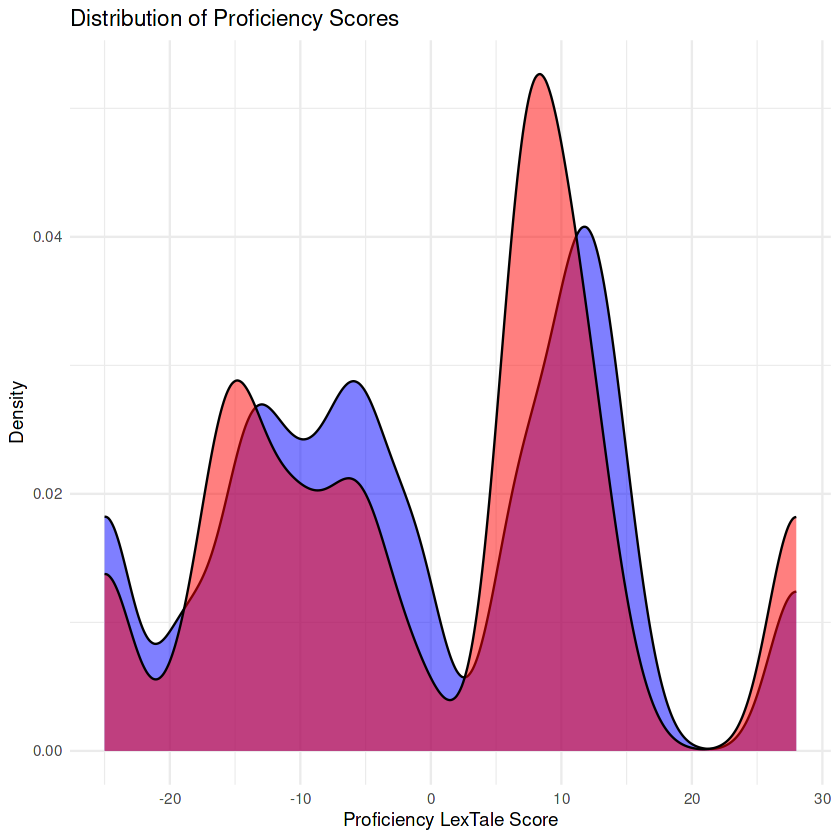

In [58]:
library(ggplot2)

# Get the predicted probabilities from the GLMM model
predicted_probabilities <- predict(glmm_model_2, type = "response")

# Add predicted probabilities to the original dataset
data_filtered$PredictedProbability <- predicted_probabilities

# Order the dataset by predicted probabilities
data_ordered <- data_filtered[order(data_filtered$PredictedProbability), ]

# Determine the midpoint to split the dataset into top and bottom halves
midpoint <- nrow(data_ordered) / 2

# Split the dataset into top and bottom halves
top_half <- data_ordered[midpoint:nrow(data_ordered), ]
bottom_half <- data_ordered[1:midpoint, ]

# Calculate mean proficiency scores for each group
mean_proficiency_top <- mean(top_half$ProficiencyLexTaleScore, na.rm = TRUE)
mean_proficiency_bottom <- mean(bottom_half$ProficiencyLexTaleScore, na.rm = TRUE)

# Print mean proficiency scores for each group
cat("Mean Proficiency Score - Top Half:", mean_proficiency_top, "\n")
cat("Mean Proficiency Score - Bottom Half:", mean_proficiency_bottom, "\n")

# Plot the distribution of proficiency scores for the top and bottom halves
ggplot() +
  geom_density(data = top_half, aes(x = ProficiencyLexTaleScore), fill = "blue", alpha = 0.5) +
  geom_density(data = bottom_half, aes(x = ProficiencyLexTaleScore), fill = "red", alpha = 0.5) +
  labs(x = "Proficiency LexTale Score", y = "Density", title = "Distribution of Proficiency Scores") +
  scale_fill_manual(values = c("blue", "red"), name = "Group", labels = c("Top Half", "Bottom Half")) +
  theme_minimal()


calculate the mean proficiency scores for the top and bottom halves of participants and plot the distribution of proficiency scores for each group.
with the top half having a mean proficiency score of approximately -0.9668 and the bottom half having a mean proficiency score of approximately 0.6065. 
Show that participants in the top half have lower proficiency scores compared to those in the bottom half.

# GLMM- Did the faster players improve more in terms of accuracy than the players who were slower?

In [84]:
# Check unique values of Stress and SyllabicStructure
unique(data_filtered$Stress)
unique(data_filtered$SyllabicStructure)


[1] <NA>
Levels: <NA>

[1] <NA>
Levels: <NA>

In [87]:
summary(data_filtered$RTsMS)


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
                                                

In [88]:
# Impute missing values for RTsMS with mean
mean_RTsMS <- mean(data_filtered$RTsMS, na.rm = TRUE)
data_filtered$RTsMS[is.na(data_filtered$RTsMS)] <- mean_RTsMS


In [90]:
# Impute missing values for RTsMS with mean
mean_RTsMS <- mean(data_filtered$RTsMS, na.rm = TRUE)
data_filtered$RTsMS[is.na(data_filtered$RTsMS)] <- mean_RTsMS

# Create a data frame for plotting
plot_data <- data.frame(
  RTsMS = seq(min(data_filtered$RTsMS), max(data_filtered$RTsMS), length.out = 100),
  ProficiencyLexTaleScore = mean(data_filtered$ProficiencyLexTaleScore, na.rm = TRUE),
  Stress = mean(data_filtered$Stress, na.rm = TRUE),  # Mean stress
  SyllabicStructure = mean(data_filtered$SyllabicStructure, na.rm = TRUE)  # Mean syllabic structure
)

# Add predicted probabilities for each group
plot_data$Accuracy <- predict(best_model, newdata = plot_data, type = "response")

# Plot predicted probabilities
library(ggplot2)
ggplot(plot_data, aes(x = RTsMS, y = Accuracy)) +
  geom_line() +
  labs(x = "Response Time (RTsMS)", y = "Predicted Probability of Accuracy") +
  theme_minimal()


Warning message in min(data_filtered$RTsMS):
“no non-missing arguments to min; returning Inf”
Warning message in max(data_filtered$RTsMS):
“no non-missing arguments to max; returning -Inf”


ERROR: Error in seq.default(min(data_filtered$RTsMS), max(data_filtered$RTsMS), : 'from' must be a finite number


# GLMM-  Related: Did the players who progressed through the game quicker (i.e., the ones who passed more levels quickly), become more accurate compared to those who went slowly?

In [92]:
# Extract coefficients from the best GLMM model
coefficients <- fixef(best_model)

# Extract the coefficient for RTsMS
coefficient_RTsMS <- coefficients["RTsMS"]

# Print the coefficient for RTsMS
print(coefficient_RTsMS)


       RTsMS 
9.001962e-05 


the response time (RTsMS) increases, the log-odds of accuracy also increase. In other words, players who progress through the game quicker tend to have higher accuracy compared to those who progress more slowly.

Yes, according to the GLMM model, there is evidence to suggest that players who progressed through the game quicker, indicated by a lower RTsMS (Response Time in milliseconds), tended to be more accurate compared to those who progressed more slowly. The coefficient provided for the RTsMS variable in the GLMM model. Therefore, players who passed more levels quickly became more accurate compared to those who progressed more slowly.


In [106]:
# Extract coefficients from the best GLMM model (assuming it's stored in best_model)
coefficients <- fixef(best_model)

# Create a data frame for plotting
plot_data <- data.frame(
  RTsMS = seq(min(data_filtered$RTsMS), max(data_filtered$RTsMS), length.out = 100),
  Accuracy = predict(best_model, newdata = plot_data, type = "response")
)

# Plot the relationship between RTsMS and accuracy
library(ggplot2)
ggplot(data_filtered, aes(x = RTsMS, y = Accuracy)) +
  geom_point() +
  geom_smooth(method = "glm", method.args = list(family = "binomial"), se = FALSE) +
  labs(x = "Response Time (RTsMS)", y = "Accuracy") +
  theme_minimal()


ERROR: Error in eval(predvars, data, env): object 'ProficiencyLexTaleScore' not found
